# Исследование объявлений о продаже квартир

**Описание проекта:** требуется установить параметры объектов недвижимости из датасета. В дальнешем эти данные будут использованы для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности.  

**Задачи:**
1. провести предобработку данных;
2. провести исследовательский анализ данных;
3. сделать выводы.

**Предоставленные данные:**  предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма). 

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span><ul class="toc-item"><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Число-этажей-в-доме" data-toc-modified-id="Число-этажей-в-доме-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Число этажей в доме</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Апартаменты" data-toc-modified-id="Апартаменты-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Апартаменты</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Балконы" data-toc-modified-id="Балконы-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Балконы</a></span></li><li><span><a href="#Название-населенного-пункта" data-toc-modified-id="Название-населенного-пункта-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Название населенного пункта</a></span></li><li><span><a href="#Расстояние-до-ближайшего-аэропорта,-Расстояние-до-центра-города,-Число-парков-в-радиусе-3-км,-Расстояние-до-ближайшего-парка,-Число-водоемов-в-радиусе-3-км,--Расстояние-до-ближайшего-водоема" data-toc-modified-id="Расстояние-до-ближайшего-аэропорта,-Расстояние-до-центра-города,-Число-парков-в-радиусе-3-км,-Расстояние-до-ближайшего-парка,-Число-водоемов-в-радиусе-3-км,--Расстояние-до-ближайшего-водоема-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Расстояние до ближайшего аэропорта, Расстояние до центра города, Число парков в радиусе 3 км, Расстояние до ближайшего парка, Число водоемов в радиусе 3 км,  Расстояние до ближайшего водоема</a></span></li><li><span><a href="#Длительность-публикации-объявления" data-toc-modified-id="Длительность-публикации-объявления-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>Длительность публикации объявления</a></span></li></ul></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Устранение-неявных-дубликатов" data-toc-modified-id="Устранение-неявных-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Устранение неявных дубликатов</a></span></li><li><span><a href="#Устранение-выбросов" data-toc-modified-id="Устранение-выбросов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Устранение выбросов</a></span><ul class="toc-item"><li><span><a href="#Число-фотографий-в-объявлении" data-toc-modified-id="Число-фотографий-в-объявлении-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Число фотографий в объявлении</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Общая-площадь-квартиры" data-toc-modified-id="Общая-площадь-квартиры-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Общая площадь квартиры</a></span></li><li><span><a href="#Дата-публикации-объявления" data-toc-modified-id="Дата-публикации-объявления-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Дата публикации объявления</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-2.4.6"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Количество-этажей-в-доме" data-toc-modified-id="Количество-этажей-в-доме-2.4.7"><span class="toc-item-num">2.4.7&nbsp;&nbsp;</span>Количество этажей в доме</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-2.4.8"><span class="toc-item-num">2.4.8&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Этаж-квартиры" data-toc-modified-id="Этаж-квартиры-2.4.9"><span class="toc-item-num">2.4.9&nbsp;&nbsp;</span>Этаж квартиры</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-2.4.10"><span class="toc-item-num">2.4.10&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Количество-балконов" data-toc-modified-id="Количество-балконов-2.4.11"><span class="toc-item-num">2.4.11&nbsp;&nbsp;</span>Количество балконов</a></span></li><li><span><a href="#Расстрояние-до-ближайшего-аэропорта" data-toc-modified-id="Расстрояние-до-ближайшего-аэропорта-2.4.12"><span class="toc-item-num">2.4.12&nbsp;&nbsp;</span>Расстрояние до ближайшего аэропорта</a></span></li><li><span><a href="#Расстояние-до-центра-города" data-toc-modified-id="Расстояние-до-центра-города-2.4.13"><span class="toc-item-num">2.4.13&nbsp;&nbsp;</span>Расстояние до центра города</a></span></li><li><span><a href="#Число-парков-в-радиусе-3-км" data-toc-modified-id="Число-парков-в-радиусе-3-км-2.4.14"><span class="toc-item-num">2.4.14&nbsp;&nbsp;</span>Число парков в радиусе 3 км</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка" data-toc-modified-id="Расстояние-до-ближайшего-парка-2.4.15"><span class="toc-item-num">2.4.15&nbsp;&nbsp;</span>Расстояние до ближайшего парка</a></span></li><li><span><a href="#Число-водоемов-в-радиусе-3-км" data-toc-modified-id="Число-водоемов-в-радиусе-3-км-2.4.16"><span class="toc-item-num">2.4.16&nbsp;&nbsp;</span>Число водоемов в радиусе 3 км</a></span></li><li><span><a href="#Расстояние-до-ближайшего-водоема" data-toc-modified-id="Расстояние-до-ближайшего-водоема-2.4.17"><span class="toc-item-num">2.4.17&nbsp;&nbsp;</span>Расстояние до ближайшего водоема</a></span></li><li><span><a href="#Длительность-публикации-объявления" data-toc-modified-id="Длительность-публикации-объявления-2.4.18"><span class="toc-item-num">2.4.18&nbsp;&nbsp;</span>Длительность публикации объявления</a></span></li><li><span><a href="#Итог" data-toc-modified-id="Итог-2.4.19"><span class="toc-item-num">2.4.19&nbsp;&nbsp;</span>Итог</a></span></li></ul></li></ul></li><li><span><a href="#Расчет-необходимых-новых-показателей" data-toc-modified-id="Расчет-необходимых-новых-показателей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет необходимых новых показателей</a></span><ul class="toc-item"><li><span><a href="#Расчет-цены-квадратного-метра" data-toc-modified-id="Расчет-цены-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет цены квадратного метра</a></span></li><li><span><a href="#Определение-дня-недели-публикации" data-toc-modified-id="Определение-дня-недели-публикации-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Определение дня недели публикации</a></span></li><li><span><a href="#Определение-месяца-публикации-объявления" data-toc-modified-id="Определение-месяца-публикации-объявления-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Определение месяца публикации объявления</a></span></li><li><span><a href="#Определение-года-публикации-объявления" data-toc-modified-id="Определение-года-публикации-объявления-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Определение года публикации объявления</a></span></li><li><span><a href="#Определение-типа-этажа-квартиры" data-toc-modified-id="Определение-типа-этажа-квартиры-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Определение типа этажа квартиры</a></span></li><li><span><a href="#Расчет-расстояния-до-центра-города-в-километрах" data-toc-modified-id="Расчет-расстояния-до-центра-города-в-километрах-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Расчет расстояния до центра города в километрах</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-объектов" data-toc-modified-id="Изучение-параметров-объектов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров объектов</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Цена-объекта" data-toc-modified-id="Цена-объекта-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Цена объекта</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Этаж-квартиры" data-toc-modified-id="Этаж-квартиры-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Этаж квартиры</a></span></li><li><span><a href="#Тип-этажа-квартиры" data-toc-modified-id="Тип-этажа-квартиры-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Тип этажа квартиры</a></span></li><li><span><a href="#Общее-количество-этажей-в-доме" data-toc-modified-id="Общее-количество-этажей-в-доме-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>Общее количество этажей в доме</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-метрах" data-toc-modified-id="Расстояние-до-центра-города-в-метрах-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>Расстояние до центра города в метрах</a></span></li><li><span><a href="#Расстояние-до-ближайшего-аэропорта" data-toc-modified-id="Расстояние-до-ближайшего-аэропорта-4.1.11"><span class="toc-item-num">4.1.11&nbsp;&nbsp;</span>Расстояние до ближайшего аэропорта</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка" data-toc-modified-id="Расстояние-до-ближайшего-парка-4.1.12"><span class="toc-item-num">4.1.12&nbsp;&nbsp;</span>Расстояние до ближайшего парка</a></span></li><li><span><a href="#День-и-месяц-публикации-объявления" data-toc-modified-id="День-и-месяц-публикации-объявления-4.1.13"><span class="toc-item-num">4.1.13&nbsp;&nbsp;</span>День и месяц публикации объявления</a></span></li></ul></li><li><span><a href="#Анализ-скорости-продажи-квартир" data-toc-modified-id="Анализ-скорости-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ скорости продажи квартир</a></span></li><li><span><a href="#Анализ-факторов,-влияющих-на-стоимость-объекта" data-toc-modified-id="Анализ-факторов,-влияющих-на-стоимость-объекта-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ факторов, влияющих на стоимость объекта</a></span><ul class="toc-item"><li><span><a href="#Влияние-общей-площади-на-стоимость-объекта" data-toc-modified-id="Влияние-общей-площади-на-стоимость-объекта-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Влияние общей площади на стоимость объекта</a></span></li><li><span><a href="#Влияние-жилой-площади-на-стоимость-объекта" data-toc-modified-id="Влияние-жилой-площади-на-стоимость-объекта-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Влияние жилой площади на стоимость объекта</a></span></li><li><span><a href="#Влияние-площади-кухни-на-стоимость-объекта" data-toc-modified-id="Влияние-площади-кухни-на-стоимость-объекта-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Влияние площади кухни на стоимость объекта</a></span></li><li><span><a href="#Влияние-количества-комнат-на-стоимость-квартиры" data-toc-modified-id="Влияние-количества-комнат-на-стоимость-квартиры-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Влияние количества комнат на стоимость квартиры</a></span></li><li><span><a href="#Влияние-типа-этажа-на-стоимость-квартиры" data-toc-modified-id="Влияние-типа-этажа-на-стоимость-квартиры-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Влияние типа этажа на стоимость квартиры</a></span></li><li><span><a href="#Влияние-даты-публикации-объявления-на-стоимость-квартиры" data-toc-modified-id="Влияние-даты-публикации-объявления-на-стоимость-квартиры-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Влияние даты публикации объявления на стоимость квартиры</a></span></li></ul></li><li><span><a href="#Расчет-стоимости-квадратного-метра-в-различных-населенных-пунктах" data-toc-modified-id="Расчет-стоимости-квадратного-метра-в-различных-населенных-пунктах-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расчет стоимости квадратного метра в различных населенных пунктах</a></span></li><li><span><a href="#Зависимость-цены-квадратного-метра-в-Санкт-Петербурге-от-удаленности-от-центра" data-toc-modified-id="Зависимость-цены-квадратного-метра-в-Санкт-Петербурге-от-удаленности-от-центра-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Зависимость цены квадратного метра в Санкт-Петербурге от удаленности от центра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

Импортируем библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Ознакомимся с данными.

In [2]:
# в качестве разделителя используется знак табуляции
data = pd.read_csv('~/Documents/Projects/datasets/real_estate_data.csv', sep='\t')

# выводим первые 5 строк датафрейма
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# получим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датафрейме 23699 строк и 22 столбца:  

`'total_images'` — число фотографий квартиры в объявлении  
`'last_price'` — цена на момент снятия с публикации  
`'total_area'` — общая площадь квартиры в квадратных метрах (м²)  
`'first_day_exposition'` — дата публикации  
`'rooms'` — число комнат  
`'ceiling_height'` — высота потолков (м)  
`'floors_total'` — всего этажей в доме  
`'living_area'` — жилая площадь в квадратных метрах (м²)  
`'floor'` — этаж  
`'is_apartment'` — апартаменты (булев тип)  
`'studio'` — квартира-студия (булев тип)  
`'open_plan'` — свободная планировка (булев тип)  
`'kitchen_area'` — площадь кухни в квадратных метрах (м²)  
`'balcony'` — число балконов  
`'locality_name'` — название населённого пункта  
`'airports_nearest'` — расстояние до ближайшего аэропорта в метрах (м)  
`'cityCenters_nearest'` — расстояние до центра города (м)  
`'parks_around3000'` — число парков в радиусе 3 км  
`'parks_nearest'` — расстояние до ближайшего парка (м)  
`'ponds_around3000'` — число водоёмов в радиусе 3 км  
`'ponds_nearest'` — расстояние до ближайшего водоёма (м)  
`'days_exposition'` — сколько дней было размещено объявление (от публикации до снятия)


















Заметим, что столбец `'is_apartment'` имеет тип "object", хотя представляет собой булев тип. Будем иметь это в виду.

Построим гистрограммы распределения значений в столбцах, имеющих числовой формат.

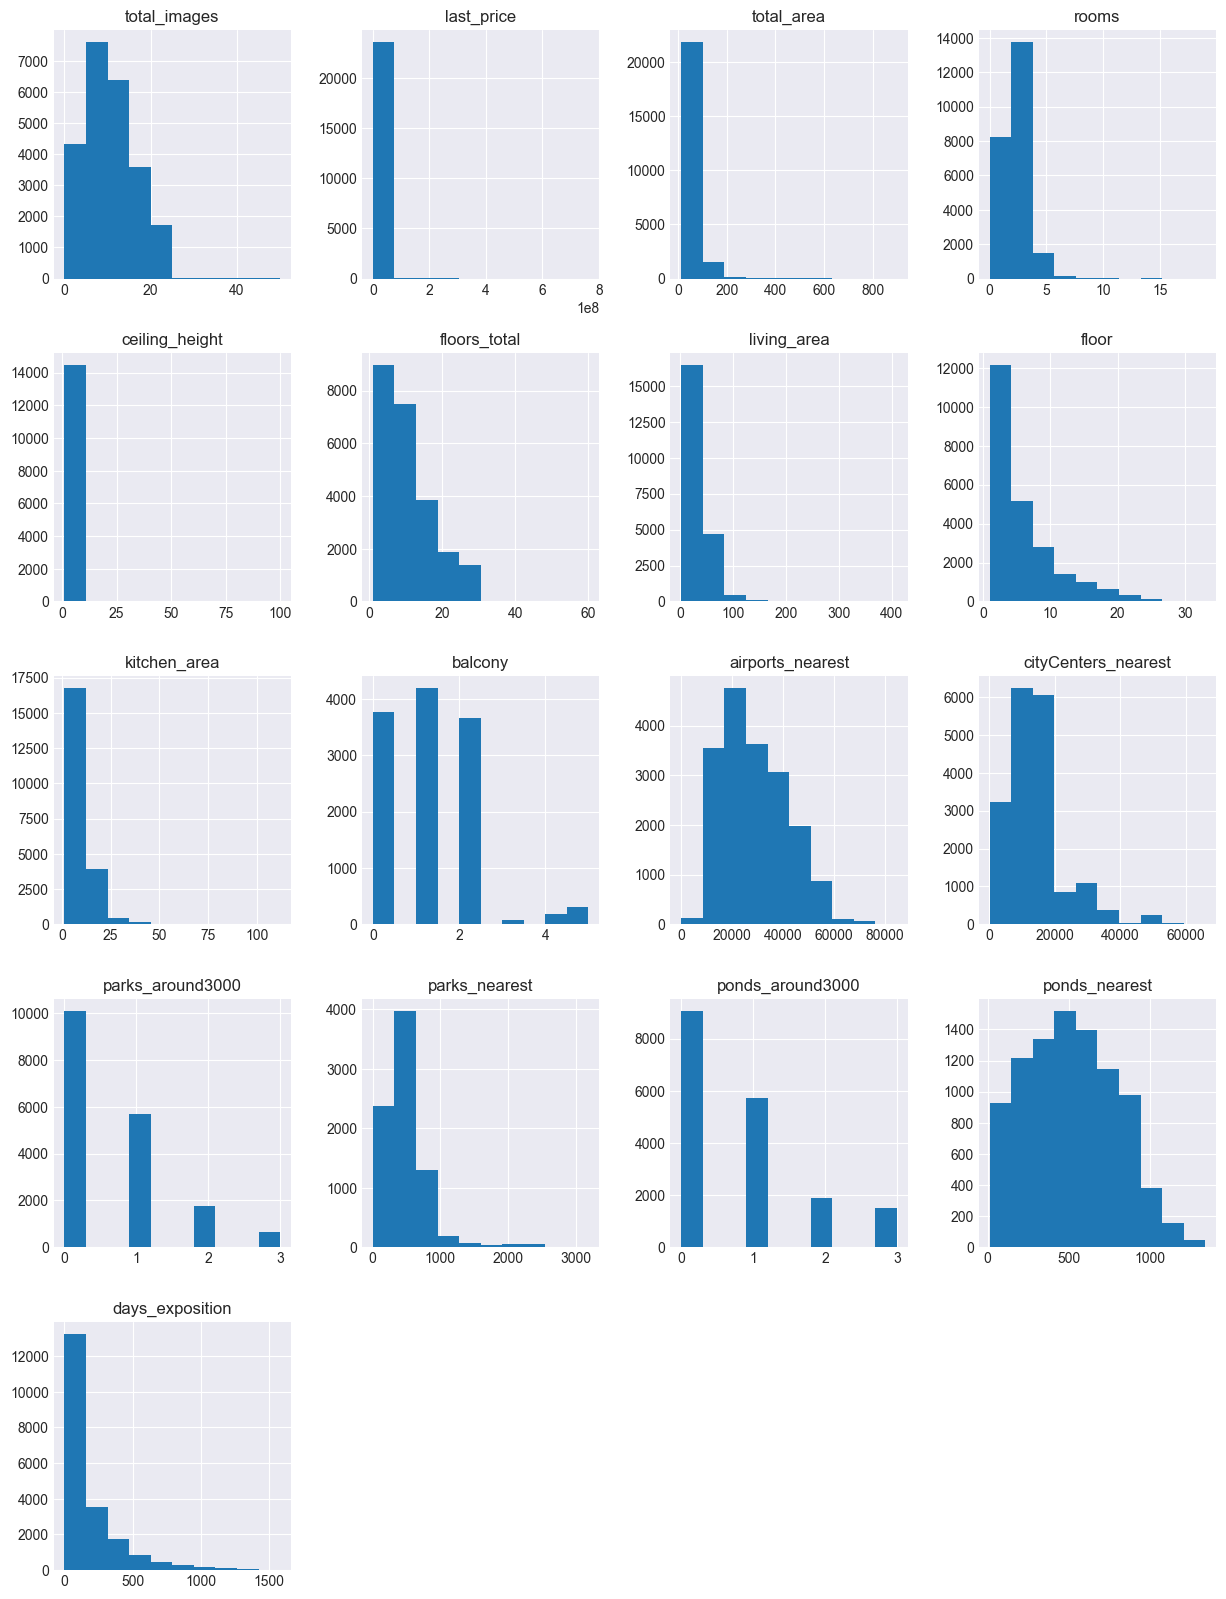

In [4]:
plt.style.use('seaborn-darkgrid')
data.hist(figsize=(15, 20));

В целом данные выглядят правдоподобно, хотя в некоторых столбцах явно есть выбросы. Можно приступать к предобработке.

## Предобработка данных

### Обработка пропущенных значений

Вычислим долю пропущенных значений в каждом из столбцов.

In [5]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

#### Высота потолков
В столбце `'ceiling_height'` 39% пропущенных значений — это много. Вероятно, значительная часть людей не знает точную высоту потолков и не имеет лазерного дальномера, чтобы оценить ее, поэтому оставляет поле пустым. Высота потолков в квартирах, как правило, варьирует в небольших пределах, но смысла заменять отсутствующие данные медианными значениями, нет. Оставим пропуски без изменений, чтобы не искажать данные.

#### Число этажей в доме
Следующий столбец с пропусками — `'floors_total'`. Пропущенных значений в столбце около 4%. Проверим, пропускались ли значения только в тех случаях, когда квартира располагалась в одноэтажном доме. Для этого построим график распределения значений в столбце `'floors'` для строк, в которых не указана этажность дома. 

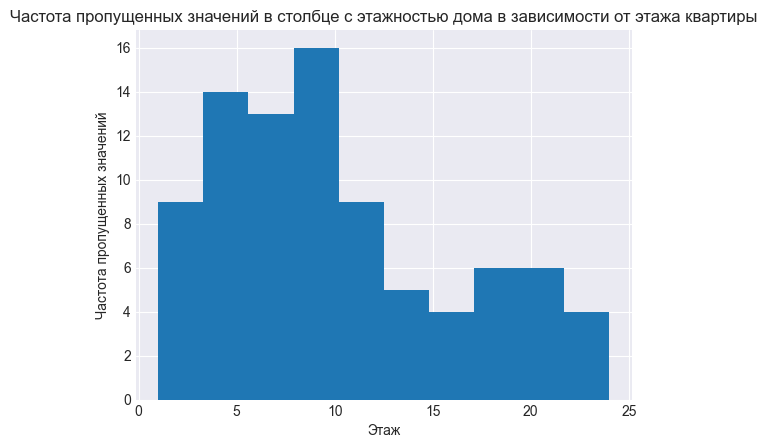

In [6]:
data[data.floors_total.isna()]['floor'].hist();
plt.title('Частота пропущенных значений в столбце с этажностью дома в зависимости от этажа квартиры')
plt.xlabel('Этаж');
plt.ylabel('Частота пропущенных значений');

Видно, что этажность дома не указана в том числе для многоэтажек. Вероятно пропуски связаны с "человеческим фактором" — небольшая доля пропусков лишь подтверждает это.  
Все, что мы знаем про значения `'floors_total'` — это то, что они не могут быть меньше значений `'floor'` в той же строке. Но нет уверенности, что замена `'floors_total'` на `'floor'` принесет какую-либо пользу (скорее может даже навредить), поэтому просто оставим пропущенные значения, тем более, что доля их в датафрейме невелика.

#### Жилая площадь
В столбце `living_area` 8% пропущенных значений. При этом в столбце `'total_area'` пропусков нет. Действительно, практически каждый без труда может назвать площадь своей квартиры, но с жилой площадью все сложнее. Пользователи могли не указать жилую площадь, потому что не знают ее.  
Чтобы заполнить пропуски, мы можем рассчитать, как соотносятся жилая площадь с общей площадью квартиры для заполненных строк, и использовать полученный коэффициент для предсказания жилой площади в тех строках, где значения отсутствуют. Поскольку значение этого коэффициента, скорее всего, связно с количеством комнат (чем больше комнат — тем меньшая доля площади приходится на кухню, санузлы и балконы), сгруппируем датафрейм по количеству комнат и посчитаем коэффициент в каждой группе отдельно. 


In [7]:
# считаем коэффициент ltt (living to total) как отношение медианы жилой площади к медиане общей площади, 
# сгруппировав квартиры по количеству комнат
# результат представляем в виде словаря
ltt_table = data.pivot_table(index='rooms', values=['living_area', 'total_area'], aggfunc='median')
ltt_table = (ltt_table['living_area'] / ltt_table['total_area']).to_dict()
# поставляем список числа комнат, для которых обнаружены пропущенные значения
rooms_num_list = data[data['living_area'].isna()]['rooms'].value_counts().index.to_list()
# пробегаем по всем количествам комнат и заменяем нулевые значения на значения, 
# полученные путем перемножения соответствующего коэффициента из словаря на общую площадь
for rooms_num in rooms_num_list:
    data.loc[data['rooms'] == rooms_num, 'living_area'] = data.loc[data['rooms'] == rooms_num, 'living_area'].fillna(ltt_table[rooms_num]*data['total_area'])

Проверяем, успешно ли заполнились пропуски:

In [8]:
data.isna().sum()/data.isna().count()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.000000
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

#### Апартаменты

В столбце `'is_apartment'` 88% пропущенных значений. Это настораживает. Возможно, в процессе выгрузки данные были утеряны. Возможно, интерфейс для пользователя не вполне понятен, и этот пункт при заполнении формы пропускается как необязательный. Можно предположить, что владельцы апартаментов скорее всего укажут, что владеют апартаментами, и большая часть пропущенных значений относится к жилому фонду. Посмотрим, будет ли итоговый результат соответствовать реальным данным, если заменить все пропуски в этом столбце на 0 (нам известно, что в Санкт-Петербурге на рынке недвижимости апартаменты занимают около 7% по состоянию на 2021 год).

In [9]:
data['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [10]:
# делим число апартаментов на общее количество строк в датафрейме
50 / 23699

0.0021097936621798387

Если заменить все пропуски на 0, то доля апартаментов будет составлять порядка 0,2% — это очень мало, и не похоже на реальные данные. Предположение оказалось неверным. Поскольку возможностей восстановить информацию о том, является квартира апартаментами, у нас нет, оставим пропуски без изменений.

#### Площадь кухни
Площадь кухни не заполнена почти в 10% случаев. Проверим, не связано ли это с тем, что все эти квартиры являются студиями.

In [11]:
data[data['kitchen_area'].isna()]['studio'].value_counts()

False    2129
True      149
Name: studio, dtype: int64

Только 149 квартир с незаполненной площадью кухни являются студиями, что опровергает наше предположение. Поскольку мы теперь знаем нежилую площадь для каждой квартиры, мы могли бы вычислить коэффициент соответствия между площадью кухни и нежилой площадью, и затем заменить пропуски "смоделированными" значениями аналогично тому, как мы это сделали в п. 2.1.3. Но с учетом того, что жилая (а значит, и нежилая) площадь уже содержит в себе "смоделированные" значения, полученные результаты могут быть ненадежными. Поскольку доля пропущенных значений в столбце `'kitchen_area'` невелика, оставим пропущенные значения без изменений.

#### Балконы
В столбце `'balcony'` почти половина пропущенных значений. Логично предположить, что это поле не заполнялось в случае, если балконов в квартире нет. Заменим все отсутствующие значения на 0.

In [12]:
data['balcony'] = data['balcony'].fillna(0)

Проверяем, успешно ли заполнились пропуски:

In [13]:
data.isna().sum()/data.isna().count()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.000000
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

#### Название населенного пункта
Населенный пункт не указан только для 2% квартир (спишем на "человечески фактор" — забыли, не заметили). Разумного способа восстановить названия населенных пунктов у нас нет, доля пропусков невелика — поэтоу просто заменим отсутствующие значения на заглушку "Нет данных". 

In [14]:
data['locality_name'] = data['locality_name'].fillna('Нет данных')

Проверяем, успешно ли заполнились пропуски:

In [15]:
data.isna().sum()/data.isna().count()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.000000
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

#### Расстояние до ближайшего аэропорта, Расстояние до центра города, Число парков в радиусе 3 км, Расстояние до ближайшего парка, Число водоемов в радиусе 3 км,  Расстояние до ближайшего водоема
Пропущенных значений в этих столбцах достаточно много:
- около 23% для расстояния до ближайшего аэропорта и до центра города, числа парков и водоемов в радусе 3 км;
- 62-66% для расстояния до ближайшего парка и до ближайшего водоема.  

Вероятно, это объясняется сложностью заполнения таких картографических данных: нужно открывать карту и измерять расстояние до соответствующих точек. Кроме того, пользователи могут справедливо счесть эту информацию избыточной — ведь на карте потенциальный покупатель может посмотреть, как далеко от центра, аэропорта или парка расположена квартира. Поскольку у нас нет информации о координатах квартир, восстановить полученные данные у нас не получится. Заменять пропуски медианными значениями тоже кажется неразумным. Поэтому оставим пропуски без изменений.

#### Длительность публикации объявления

В 13% строках нет информации о длительности публикации объявления. По всей видимости, это связано с тем, что эти объявления еще не сняты с публикации. Заменим пропуски в этих данных на 0 и будем держать в уме тот факт, то 0 соответствует еще актуальным объявлениям. Предварительно убедимся, что изначально в этом столбце не было нулей.

In [16]:
data['days_exposition'].min()

1.0

Минимальное значение в столбце `'days_exposition'` до устранения пропусков — 1. Значит, можно заменять пропуски нулем.

In [17]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Проверяем, успешно ли заполнились пропуски:

In [18]:
data.isna().sum()/data.isna().count()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.000000
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.000000
dtype: float64

### Изменение типов данных
 
Преобразуем данные в столбце `'first_day_exposition'` в формат `datetime` — это понадобится нам для дальнейшей работы. Выведем отдельно интересующий нас столбец, чтобы оценить формат даты.

In [19]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

Преобразовываем данные и проверяем результат.

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Помним о том, что в столбце `'is_apartment'` содержатся данные в формате `object` вместо `bool`, но поскольку для дальнейшей работы этот столбец нам не пригодится, можно его пока оставить без изменений. Также обращаем внимание на то, что несмотря на формат `float64` в столбцах `'floors_total'`, `'balcony'`, `'parks_around3000'`, `'ponds_around3000'`, `'days_exposition'` должны содержаться целочисленные значения, но приводить их к формату `int` пока не имеет смысла.

### Устранение неявных дубликатов

Получим список уникальных значений в столбце `'locality_name'`.

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Оценим количество уникальных значений в этом списке.

In [22]:
len(data['locality_name'].unique())

365

В значениях столбца `'locality_name'` заменим "посёлок", "посёлок городского типа" и "поселок городского типа" на "поселок". После чего убедимся в том, что число уникальных значений в столбце уменьшилось.

In [23]:
data['locality_name'] = data['locality_name'].replace(['поселок городского типа', 'посёлок', 'посёлок городского типа'], 'поселок', regex=True)
len(data['locality_name'].unique())

339

### Устранение выбросов

Пройдемся по всем столбцам и найдем в каждом из них выбивающиеся и аномальные значения.

#### Число фотографий в объявлении
Построим гистрограмму, отражающую распределение значений в данном столбце.

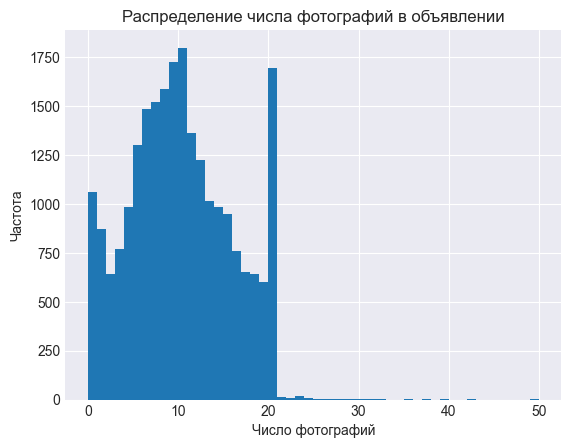

In [24]:
data.hist('total_images', bins=50);
plt.title('Распределение числа фотографий в объявлении')
plt.xlabel('Число фотографий');
plt.ylabel('Частота');

Число фотографий в объявлениях варьирует в пределах от 0 до 50, при этом почти во всех объявлениях число фотографий менее 21. Данные выглядят правдоподобно, смысла избавляться от "хвоста" распределения нет, поскольку большое число фотографий вряд ли связано с какой-то ошибкой, скорее с желанием продавца показать квартиру как можно подробнее.

#### Цена 
Построим гистрограмму, отражающую распределение значений в данном столбце.

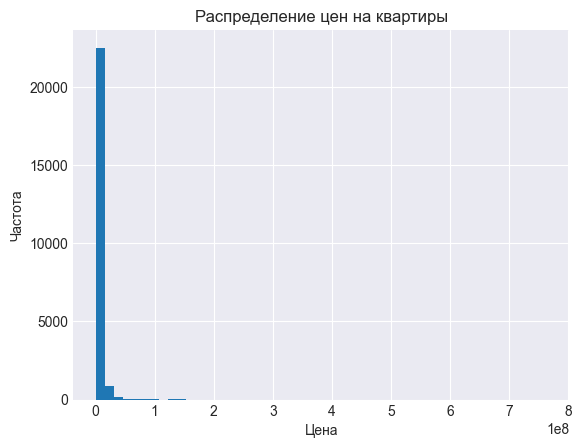

In [25]:
data.hist('last_price', bins=50);
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена');
plt.ylabel('Частота');

В датафрейме есть квартиры, цены на которые достигают 800 млн. Однако большая часть квартир имеет цену в пределах 60 млн. Посмотрим на интервал цен 0—100 млн поближе:

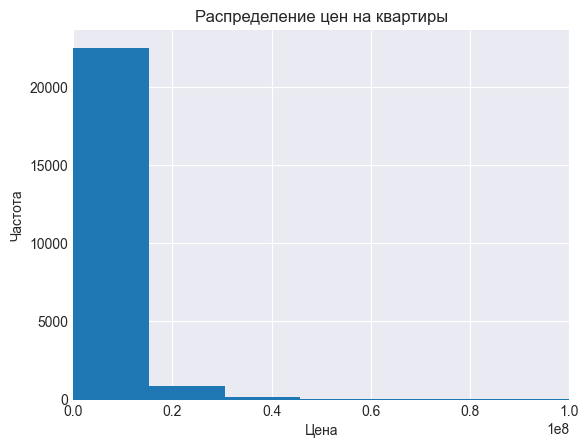

In [26]:
data.hist('last_price', bins=50);
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена');
plt.ylabel('Частота');
plt.xlim(0, 100000000);

Выходит, цена на большую часть квартир действительно составляет не больше 60 млн. Далее необходимо проверить, что представляют из себя квартиры стоимостью более 100 млн. Возможно, такие цены обусловлены опечаткой. Для этого посмотрим на площади квартир стоимостью более 100 млн. Если эти цены не представляют собой опечатки, то площадь таких квартир должна быть очень большой.

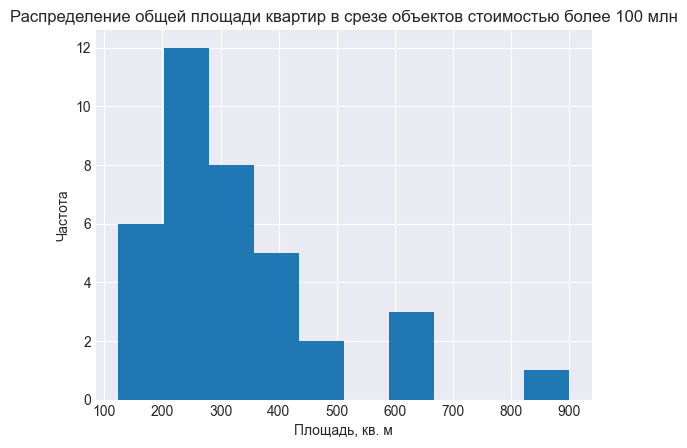

In [27]:
data.query('last_price > 100000000')['total_area'].hist();
plt.title('Распределение общей площади квартир в срезе объектов стоимостью более 100 млн')
plt.xlabel('Площадь, кв. м');
plt.ylabel('Частота');

Действительно, большая часть объектов со стоимостью от 100 млн имеет площадь не менее 200 м². Заключаем, что такая высокая стоимость не представляет собой опечатки.  
Тем не менее, избавимся от "хвоста" с очень большими ценами: нас интересуют более типичные квартиры. В новый отфильтрованный датафрейм `df` включим только те квартиры, стоимость которых не превышает 60 млн.

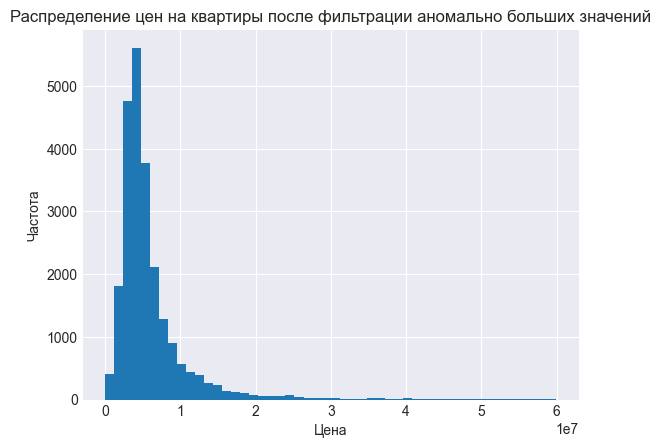

In [28]:
df = data.query('last_price < 60000000')
# проверим, как выглядит распределение после фильтрации аномально больших значений
df.hist('last_price', bins=50);
plt.title('Распределение цен на квартиры после фильтрации аномально больших значений')
plt.xlabel('Цена');
plt.ylabel('Частота');

Теперь убедимся в том, что в распределении нет аномально низких значений. Рассмотрим ближе левую чатсь гистограммы.

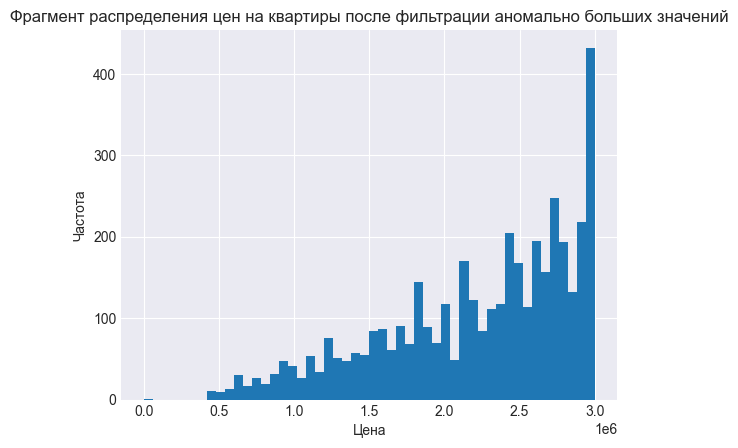

In [29]:
df.hist('last_price', bins=50, range=(0, 3000000));
plt.title('Фрагмент распределения цен на квартиры после фильтрации аномально больших значений')
plt.xlabel('Цена');
plt.ylabel('Частота');

В датафрейме есть аномально низкие значения цены на квартиру — вероятно, выброс. Посмотрим на строки со значением цены ниже 400 000.

In [30]:
df.query('last_price < 400000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,...,40.5,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Квартира площадью более 100 м² в Санкт-Петербурге за 12190 — это явно какая-то ошибка. Скорее всего, потерян один ноль. Но аномальная строчка всего одна — от нее можно просто избавиться.

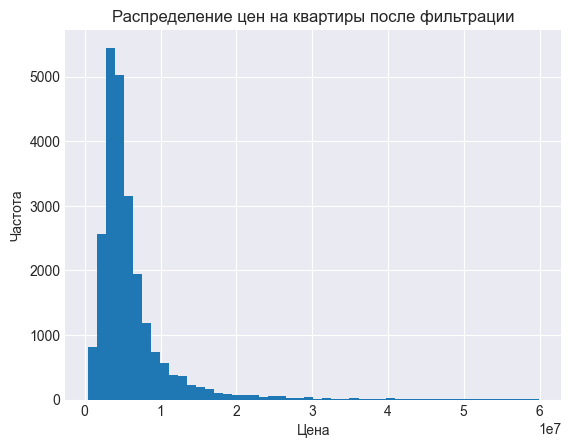

In [31]:
df = df.query('last_price >= 400000')
# проверим, как выглядит распределение после фильтрации аномально больших и аномально маленьких значений
df.hist('last_price', bins=50);
plt.title('Распределение цен на квартиры после фильтрации')
plt.xlabel('Цена');
plt.ylabel('Частота');

Далее будем работать с новым отфильльтрованным датафреймом `df`.

#### Общая площадь квартиры
Построим гистрограмму, отражающую распределение значений в данном столбце.

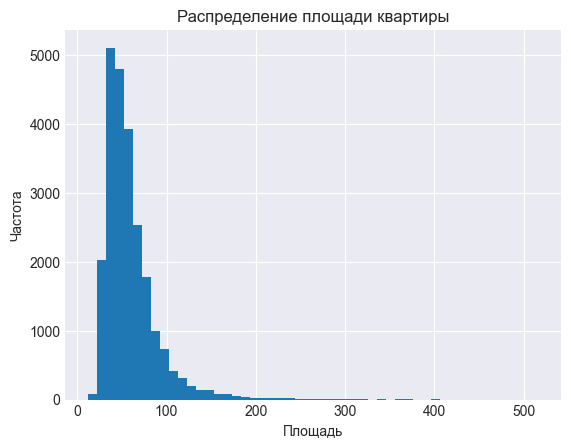

In [32]:
df.hist('total_area', bins=50);
plt.title('Распределение площади квартиры')
plt.xlabel('Площадь');
plt.ylabel('Частота');

Судя по гистограмме, площадь большинства квартир укладывается в 100 м². При этом квартиры площадью более 300 м² представляют собой редкость. Взглянем на них.

In [33]:
df.query('total_area > 300')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.90,2017-10-04,7,3.20,6.0,312.500000,4,NaN,...,26.40,0.0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
866,5,25000000.0,363.00,2017-12-23,14,3.16,5.0,222.000000,4,NaN,...,16.60,0.0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
1388,20,59800000.0,399.00,2015-01-21,5,5.60,6.0,250.066337,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
2580,6,30900000.0,338.60,2017-10-16,7,3.86,6.0,230.000000,4,NaN,...,20.00,0.0,Санкт-Петербург,24957.0,5641.0,0.0,NaN,0.0,NaN,406.0
3676,12,28789000.0,441.98,2019-01-23,4,NaN,6.0,283.080846,6,NaN,...,35.05,0.0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,0.0
4237,1,50000000.0,517.00,2017-10-14,7,NaN,4.0,332.000000,3,NaN,...,22.00,0.0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,0.0
5042,20,35000000.0,380.00,2017-08-17,6,NaN,3.0,198.000000,2,NaN,...,50.00,0.0,Пушкин,18490.0,30643.0,1.0,527.0,1.0,668.0,15.0
5873,0,38000000.0,400.00,2019-03-15,7,3.60,3.0,271.028037,1,NaN,...,NaN,0.0,Санкт-Петербург,24889.0,5457.0,1.0,271.0,0.0,NaN,0.0
6221,8,34000000.0,470.30,2018-01-14,4,NaN,3.0,248.700000,3,NaN,...,40.00,0.0,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
7664,20,40000000.0,315.00,2017-04-20,5,3.50,6.0,182.000000,4,NaN,...,37.00,0.0,Санкт-Петербург,22526.0,3175.0,1.0,1028.0,1.0,399.0,81.0


В новом отфильтрованном датафрейме всего 31 строчка с квартирами площадью более 300 м². Эти квартиры не выглядят как аномалии — у них больше и жилая площадь, и цена. Тем не менее, оставим в нашем датафрейме только более распространенные варианты квартир — с площадью до 300 м².

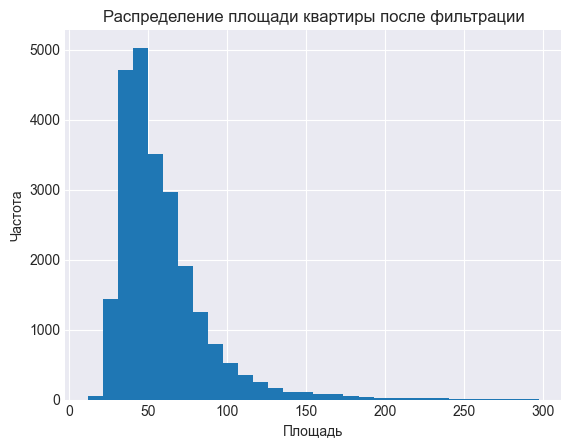

In [34]:
df = df.query('total_area < 300')
# проверим, как выглядит распределение после фильтрации
df.hist('total_area', bins=30);
plt.title('Распределение площади квартиры после фильтрации')
plt.xlabel('Площадь');
plt.ylabel('Частота');

Наконец, убедимся, что в датафрейме нет квартир, площадь которых меньше 9 м², установленных нормативом.

In [35]:
df.query('total_area < 9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Дата публикации объявления
Построим гистрограмму, отражающую распределение значений в данном столбце.

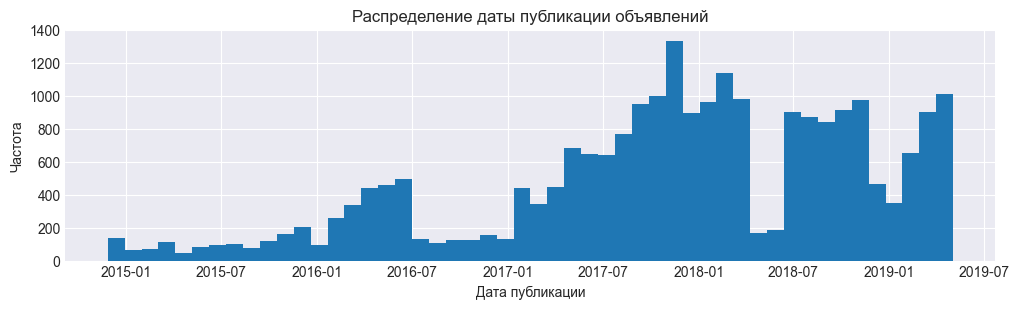

In [36]:
df.hist('first_day_exposition', figsize=(12,3), bins=50);
plt.title('Распределение даты публикации объявлений')
plt.xlabel('Дата публикации');
plt.ylabel('Частота');

Видно, что количество опубликованных объявлений в целом нарастало с 2016 года, при этом есть "провалы" во второй половине 2016 года и в середине 2018 года. Аномальных значений нет.

#### Количество комнат
Поскольку количество комнат должно быть целым числом, выведем количество уникальных значений в этом столбце.

In [37]:
df['rooms'].value_counts()

1     8046
2     7936
3     5790
4     1152
5      298
0      196
6       87
7       42
8        7
9        4
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64

Также для наглядности построим гистрограмму распределения значений в столбце.

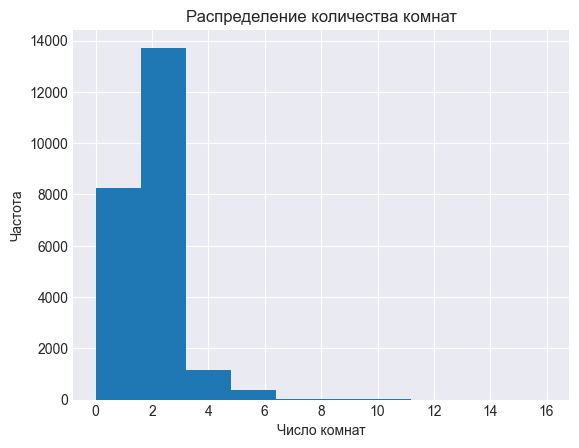

In [38]:
df.hist('rooms');
plt.title('Распределение количества комнат')
plt.xlabel('Число комнат');
plt.ylabel('Частота');

В датафрейме есть данные о квартирах с 0 комнат. Можно предположить, что это кваритры-студии. Проверим, действительно ли все квартиры с 0 комнат являются студиями. 

In [39]:
df.query('rooms == 0 and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.000000,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.300000,19,NaN,...,NaN,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,18.034549,8,NaN,...,NaN,1.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.000000,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.000000,7,NaN,...,NaN,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03,0,NaN,18.0,15.000000,16,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01,0,NaN,4.0,10.500000,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01,0,NaN,18.0,18.700000,9,NaN,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10,0,NaN,10.0,18.000000,6,NaN,...,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01,0,NaN,25.0,18.000000,4,NaN,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


В 58 строках есть данные об объектах, которые не являются студиями, но при этом имеют 0 комнат. Возможно, таким образом обозначены комнаты в коммуналках. Небольшая общая площадь и отсутствие данных о площади кухни во всех таких строках только потверждает это предположение. Эти строки мы не будем включать в отфильтрованный датафрейм.

In [40]:
df = df.query('not(rooms == 0 and studio == False)')

Оставшиеся значения `'0'` в столбце `'rooms'` соответствуют тем случаям, когда квартира является студией. Для единообразия заменим на 1.

In [41]:
df = df.replace({'rooms': {0: 1}})

Также видно, что в исходном датафрейме есть квартиры с 11, 14 и 16 комнатами. При этом квартиры с количеством более 7 комнат встречаются уже очень редко. Отфильтруем в новый датафрем только те квартиры, число комнат в которых не превышает 8.

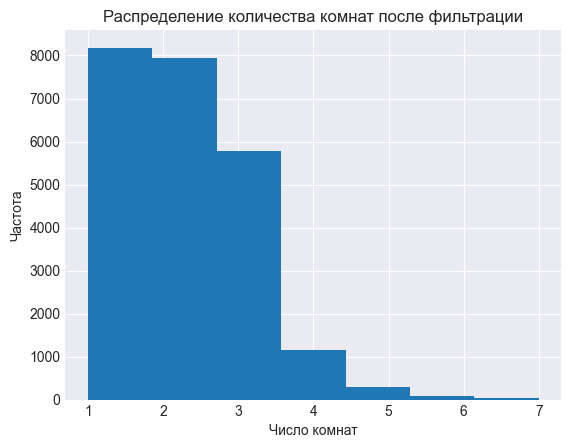

In [42]:
df = df.query('rooms < 8')
# проверим, как выглядит распределение после фильтрации
df.hist('rooms', bins=7);
plt.title('Распределение количества комнат после фильтрации')
plt.xlabel('Число комнат');
plt.ylabel('Частота');

#### Высота потолков
Построим гистрограмму, отражающую распределение значений в данном столбце.

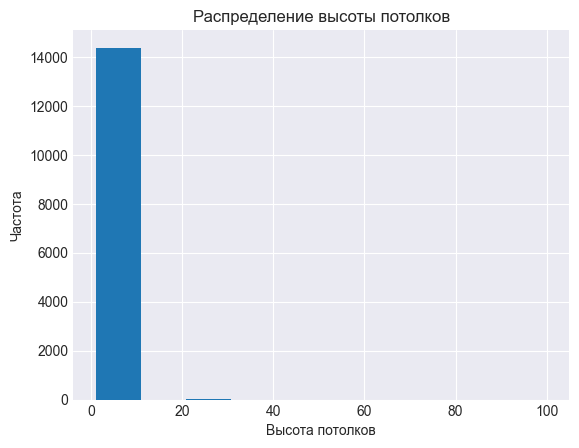

In [43]:
df.hist('ceiling_height');
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков');
plt.ylabel('Частота');

В столбце `'ceiling_height'` явно есть аномально большие значения. Логика подсказывает, что квартиры с высотой потолков более 5 м уже можно считать "подозрительными". Отфильтруем такие квартиры и посмотрим на них отдельно. Рядом выведем общую площадь объекта, чтобы представлять, о каких помещениях идет речь.

In [44]:
df.query('ceiling_height > 5')[['ceiling_height', 'total_area']].sort_values(by='ceiling_height')

,ceiling_height,total_area
12628,5.3,50.0
7578,5.5,143.0
21227,5.8,71.0
3474,8.0,30.0
17442,8.0,54.0
15743,8.0,67.0
5863,8.3,45.0
22309,10.3,45.0
15061,14.0,56.4
17496,20.0,92.9


Значения высоты потолков 24, 25, 26, 27, 27.5 и 32 метра, скорее всего, содержат в себе ошибку — десятичный разделитель в них может быть расположен ошибочно. Переставим десятичный разделитель влево на 1 знак.

In [45]:
df = df.replace({'ceiling_height': {24: 2.4, 25: 2.5, 26: 2.6, 27: 2.7, 27.5: 2.75, 32: 3.2}})

Посмотрим, как теперь выглядит список аномально больших значений высоты потолков.

In [46]:
df.query('ceiling_height > 5')[['ceiling_height', 'total_area']].sort_values(by='ceiling_height')

,ceiling_height,total_area
12628,5.3,50.0
7578,5.5,143.0
21227,5.8,71.0
3474,8.0,30.0
15743,8.0,67.0
17442,8.0,54.0
5863,8.3,45.0
22309,10.3,45.0
15061,14.0,56.4
17496,20.0,92.9


Высота потолков от 5 до 10 метров теоретически могут встречаться в двухэтажных квартирах. Но оставшиеся значения высоты потолков (более 10 метров) нельзя объяснить ни особенностями архитектуры (слишком маленькая площадь помещения для таких высоких потолков), ни ошибочно проставленным десятичным разделителем. Доля квартир с потолками более 5 м невелика, исключим их из датафрейма. Поскольку в столбце  `'ceiling_height'` есть пропущенные значения, чтобы не потерять строки с пропусками, сформируем запрос следующим образом: 

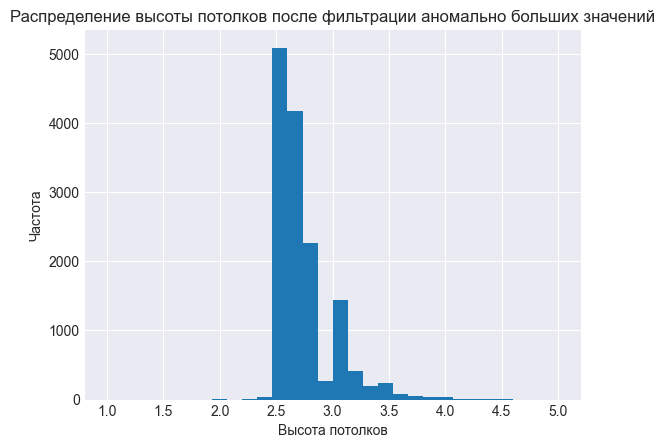

In [47]:
df = df[(df['ceiling_height'].isna() == True) | (df['ceiling_height'] <= 5)]
# проверим, как выглядит распределение после фильтрации аномально больих значений
df.hist('ceiling_height', bins = 30);
plt.title('Распределение высоты потолков после фильтрации аномально больших значений')
plt.xlabel('Высота потолков');
plt.ylabel('Частота');

Теперь очевидно, что в датафрейме есть и экстремально низкие значения высоты потолков. Отфильтруем те значения высоты потолков, которые ниже 2.3 м.

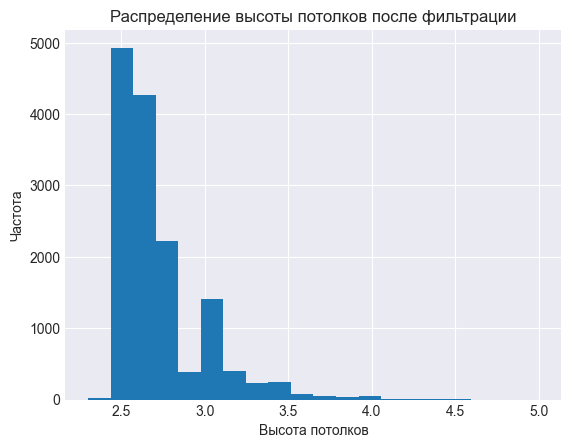

In [48]:
df = df[(df['ceiling_height'].isna() == True) | (df['ceiling_height'] >= 2.3)]
# проверим, как выглядит распределение после фильтрации всех аномальных значений
df.hist('ceiling_height', bins = 20);
plt.title('Распределение высоты потолков после фильтрации')
plt.xlabel('Высота потолков');
plt.ylabel('Частота');

#### Количество этажей в доме
Построим гистрограмму, отражающую распределение значений в данном столбце.

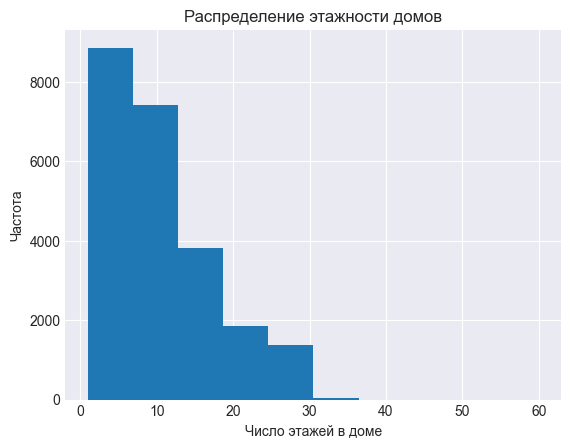

In [49]:
df.hist('floors_total');
plt.title('Распределение этажности домов')
plt.xlabel('Число этажей в доме');
plt.ylabel('Частота');

В самом высоком жилом доме в Санкт-Петербурге всего 37 этажей, поэтому отбросим те строки, в которых количество этажей в доме превышает 37, помня о пропусках в данных.

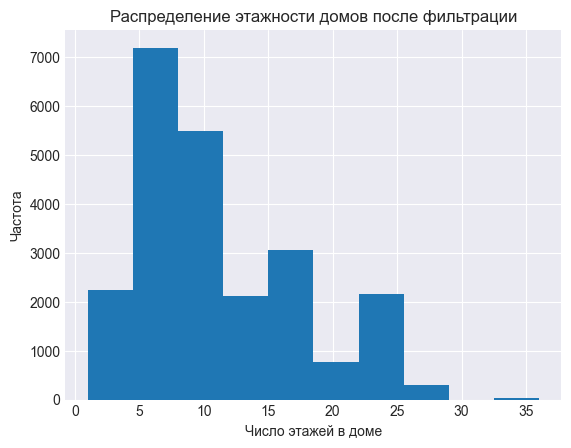

In [50]:
df = df[(df['floors_total'].isna() == True) | (df['floors_total'] < 38)]
# проверим, как выглядит распределение после фильтрации всех аномальных значений

df.hist('floors_total');
plt.title('Распределение этажности домов после фильтрации')
plt.xlabel('Число этажей в доме');
plt.ylabel('Частота');

Наконец, поскольку формат данных в столбце `'floors_total'` — `float64`, необходимо убедиться в том, что в столбце с числом этажей нет дробных чисел.

In [51]:
# если число целое, то остаток от его деления на 1 равен 0
# если число дробное, что остаток от его деления на 1 не равен 0 
(df[df['floors_total'].isna() == False]['floors_total'] % 1  == 0).value_counts()

True    23373
Name: floors_total, dtype: int64

Все не пропущенные значения целочисленные, значит, можно двигаться дальше.

#### Жилая площадь
Для начала убедимся в том, что в датафрейме отсутствуют строки, в которых жилая площадь больше, чем общая.

In [52]:
len(df.query('living_area > total_area'))

0

Убедимся также в том, что в датафрейме нет квартир, в которых размер общей площади превышает размер жилой площади более  в 10 и более раз (такие строки, вероятно, представляют собой аномалии).

In [53]:
df.query('total_area / living_area >= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17.0,3.0,17,NaN,...,11.0,0.0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6.0,2.0,2,NaN,...,9.0,0.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000.0,23.0,2018-01-01,1,NaN,24.0,2.0,22,NaN,...,NaN,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9.0,5.4,1,NaN,...,9.8,0.0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0


Исключим эти строки.

In [54]:
df = df.query('total_area / living_area < 10')

Поскольку жилая площадь находится в тесной связи с общей площадью квартиры, исключив аномально большие и аномально малые значения из столбца `'total_area'` мы ожидаем, что в столбце `'living_area'` их также не будет. Построим гистограмму распределения жилой площади после фильтрации.

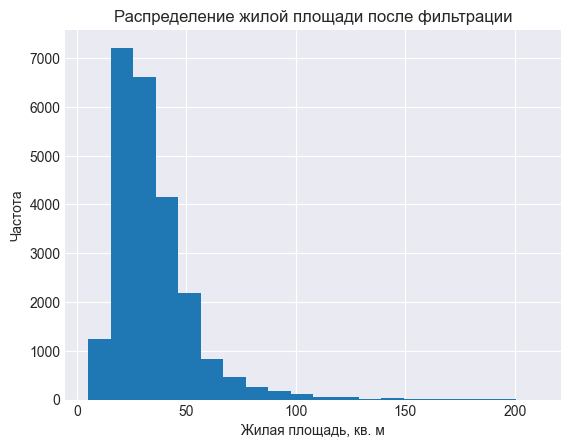

In [55]:
df.hist('living_area', bins=20);
plt.title('Распределение жилой площади после фильтрации')
plt.xlabel('Жилая площадь, кв. м');
plt.ylabel('Частота');

Для наглядности построим гистограммы распределения жилой и общей площади на одном графике.

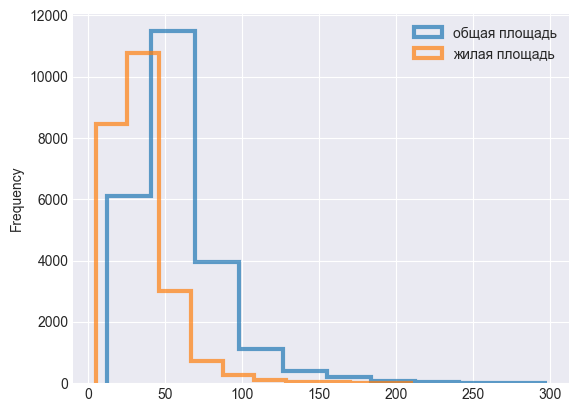

In [56]:
ax = df.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    linewidth=3,
    alpha=0.7,
    label='общая площадь',
)
df.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    linewidth=3,
    alpha=0.7,
    label='жилая площадь',
    ax=ax,
    grid=True,
    legend=True,
);

Выглядит логично: пик распределения жилой площади смещен относительно пика распределения общей площади влево.

#### Этаж квартиры
Убедимся в том, что в датафрейме нет строк, в которых этаж квартиры превышает общее число этажей в доме.

In [57]:
len(df.loc[df['floor'] > df['floors_total']])

0

Построим гистрограмму, отражающую распределение значений в столбце `'floor'` .

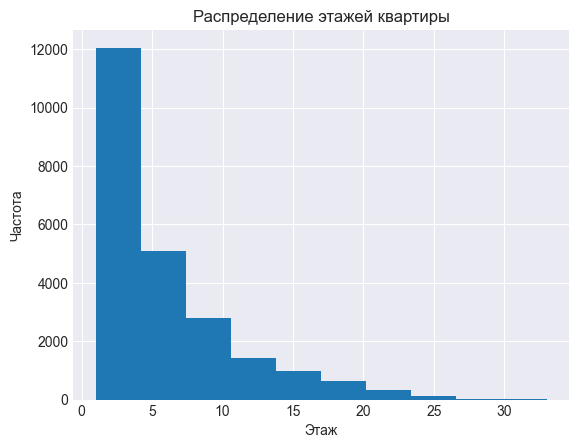

In [58]:
df.hist('floor');
plt.title('Распределение этажей квартиры');
plt.xlabel('Этаж');
plt.ylabel('Частота');

Выбросов и аномальных значений нет.

#### Площадь кухни
Убедимся в том, что в датафрейме нет строк, в которых площадь кухни превышает общую площадь квартиры.

In [59]:
len(df.query('kitchen_area > total_area'))

0

Построим гистрограмму, отражающую распределение значений в столбце  `'kitchen_area'`.

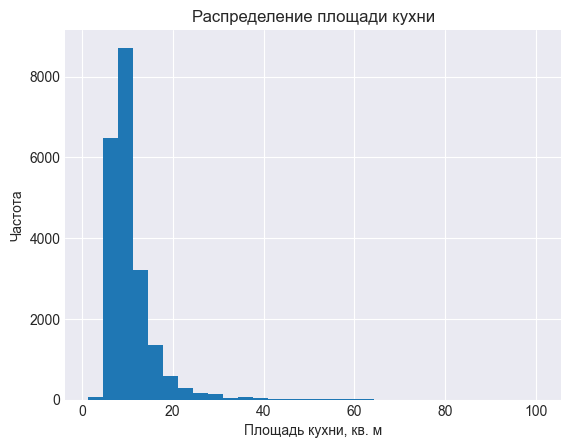

In [60]:
df.hist('kitchen_area', bins=30);
plt.title('Распределение площади кухни');
plt.xlabel('Площадь кухни, кв. м');
plt.ylabel('Частота');

В большинстве квартир площадь кухни не превышает 50 м². Посмотрим, что представляют из себя квартиры, площадь кухни которых более 50 м². Если общая площадь таких квартир значительно превышает площадь кухни, значит, данные правдоподобны.

In [61]:
(df.query('kitchen_area > 50')['kitchen_area']/df.query('kitchen_area > 50')['total_area']).describe()

count    28.000000
mean      0.409023
std       0.096179
min       0.190611
25%       0.348412
50%       0.413025
75%       0.487220
max       0.549852
dtype: float64

Площадь условно больших кухонь составляет 19—55% от общей площади квартиры. Этим данным можно верить.  
Теперь посмотрим на неправдоподобно маленькие кухни, площадь которых меньше 3 м².

In [62]:
df.query('kitchen_area < 3')[['total_area', 'rooms', 'living_area', 'kitchen_area', 'studio']]

,total_area,rooms,living_area,kitchen_area,studio
906,27.00,1,18.0,2.00,False
6262,24.00,2,16.0,2.00,False
7950,66.40,2,44.4,2.89,False
8729,18.40,1,14.0,2.40,False
9138,23.29,1,21.0,2.00,False
11033,32.00,1,16.0,2.00,False
16367,25.70,1,22.6,2.00,False
17834,34.70,1,15.5,2.30,False
19642,14.00,1,11.0,2.00,False
20217,28.50,1,19.5,1.30,False


Сложно представить себе однокомнатные или двухкомнатные квартиры, не студии, с кухнями размером 1-2 м². Таких строк немного, избавимся от них и посмотрим на получившееся распределение.

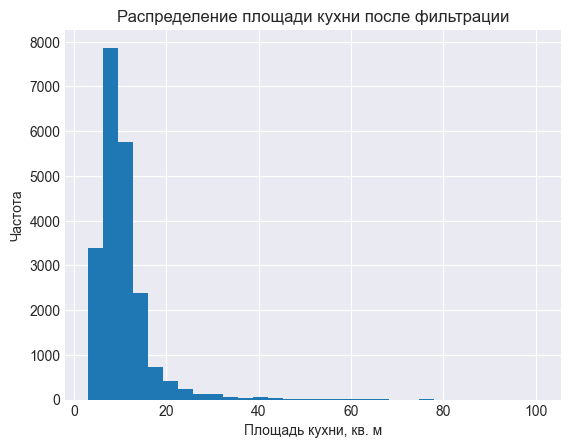

In [63]:
df = df[(df['kitchen_area'].isna() == True) | (df['kitchen_area'] >= 3)]
df.hist('kitchen_area', bins=30);
plt.title('Распределение площади кухни после фильтрации');
plt.xlabel('Площадь кухни, кв. м');
plt.ylabel('Частота');

#### Количество балконов
Посмотрим на значения в столбце с количеством балконов, и заодно убедимся, что все они — целочисленные, поскольку данные в нем принадлежат типу `float64`.

In [64]:
df['balcony'].value_counts()

0.0    15106
1.0     4155
2.0     3621
5.0      300
4.0      182
3.0       80
Name: balcony, dtype: int64

Все значения целочисленные. Есть квартиры с  4 и 5 балконами, причем их больше, чем квартир с 3 балконами. Для примера посмотрим на распределение общей площади квартир с 5 балконами.

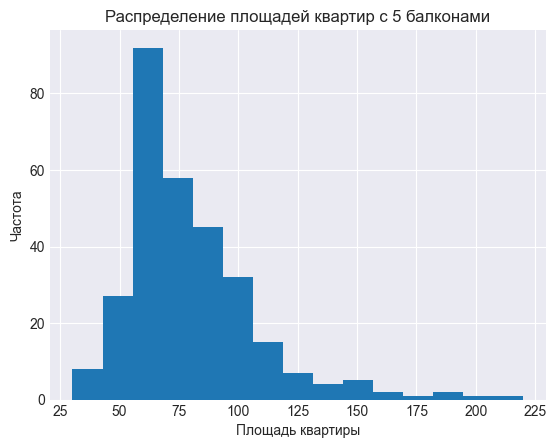

In [65]:
df[df['balcony'] == 5]['total_area'].hist(bins=15);
plt.title('Распределение площадей квартир с 5 балконами');
plt.xlabel('Площадь квартиры');
plt.ylabel('Частота');

Пик распределения приходится на квартиры площадью около 60 м². Здесь явно какая-то ошибка. Однако квартир с 5 балконами немало и в дальнейшем анализе информация о количестве балконов нам не пригодится, поэтому не будем удалять такие строки, чтобы не потерять другую содержащуюся в них информацию.

#### Расстрояние до ближайшего аэропорта

Построим гистрограмму, отражающую распределение значений в данном столбце.

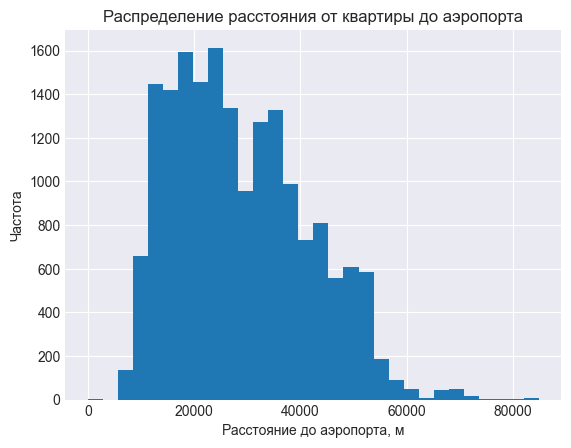

In [66]:
df.hist('airports_nearest', bins=30);
plt.title('Распределение расстояния от квартиры до аэропорта');
plt.xlabel('Расстояние до аэропорта, м');
plt.ylabel('Частота');

На гистограмме есть выброс в области нуля. Посмотрим, что это за выброс.

In [67]:
df.query('airports_nearest < 1000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Удалим строчку с выбросом из датафрейма.

In [68]:
df = df[(df['airports_nearest'].isna() == True) | (df['airports_nearest'] >= 1000)]

Обновим гистограмму.

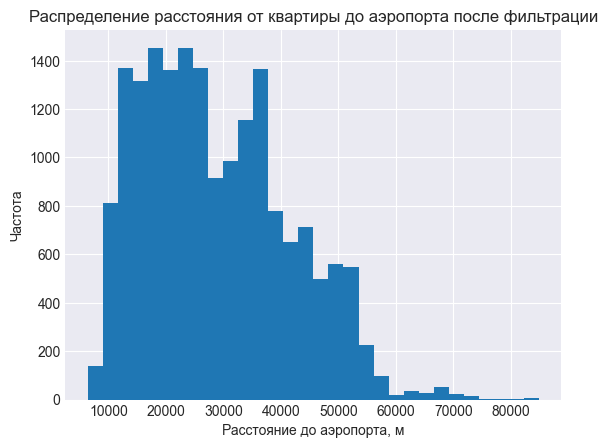

In [69]:
df.hist('airports_nearest', bins=30);
plt.title('Распределение расстояния от квартиры до аэропорта после фильтрации');
plt.xlabel('Расстояние до аэропорта, м');
plt.ylabel('Частота');

Выбросов нет, распределение выглядит правдоподобно.

#### Расстояние до центра города
Построим гистрограмму, отражающую распределение значений в данном столбце.

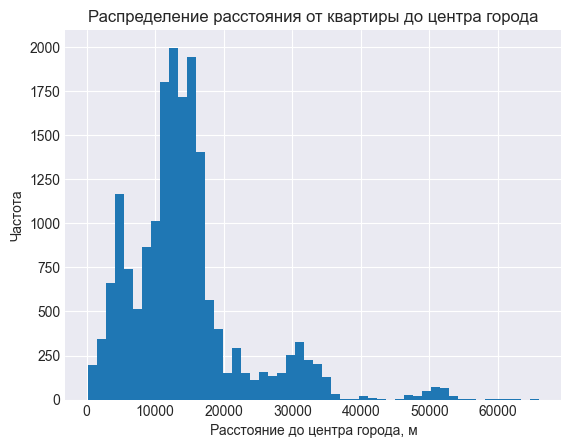

In [70]:
df.hist('cityCenters_nearest', bins = 50);
plt.title('Распределение расстояния от квартиры до центра города');
plt.xlabel('Расстояние до центра города, м');
plt.ylabel('Частота');

Распределение выглядит правдоподобно. У него несколько пиков, что связано по-видимому с тем, что в датафрейме содержится информация о квартирах в разных городах. У каждого города свой центр, и среднее расстояние до него определяется размером города.

#### Число парков в радиусе 3 км
Посмотрим на список уникальных значения в данном столбце.

In [71]:
df['parks_around3000'].value_counts()

0.0    10032
1.0     5628
2.0     1700
3.0      610
Name: parks_around3000, dtype: int64

С данными все в порядке, все они целочисленные, выбросов нет.

#### Расстояние до ближайшего парка
Построим гистрограмму, отражающую распределение значений в данном столбце.

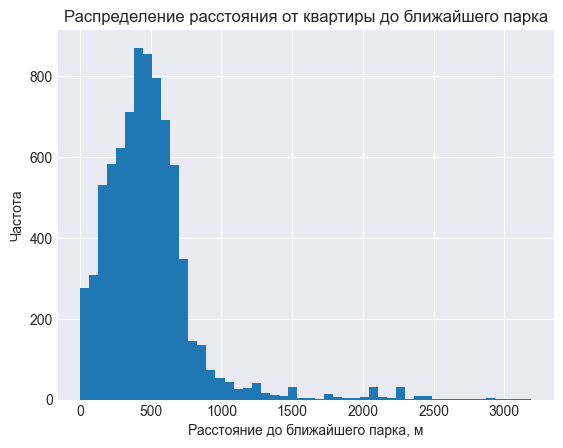

In [72]:
df.hist('parks_nearest', bins = 50);
plt.title('Распределение расстояния от квартиры до ближайшего парка');
plt.xlabel('Расстояние до ближайшего парка, м');
plt.ylabel('Частота');

Распределение скошено вправо, однако выглядит правдоподобно.

#### Число водоемов в радиусе 3 км
Посмотрим на список уникальных значения в данном столбце.

In [73]:
df['ponds_around3000'].value_counts()

0.0    9007
1.0    5659
2.0    1855
3.0    1449
Name: ponds_around3000, dtype: int64

С данными все в порядке, все значения целочисленные, выбросов нет.

#### Расстояние до ближайшего водоема
Построим гистрограмму, отражающую распределение значений в данном столбце.

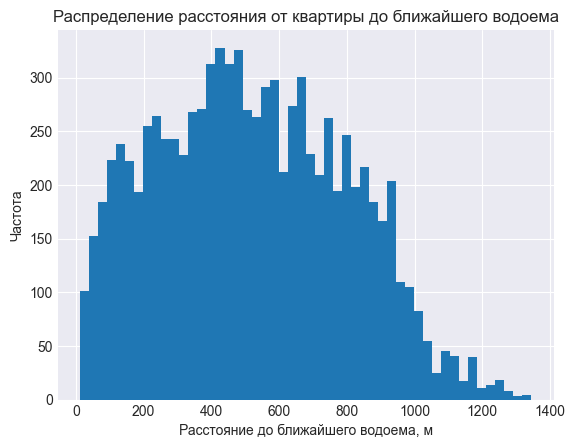

In [74]:
df.hist('ponds_nearest', bins = 50);
plt.title('Распределение расстояния от квартиры до ближайшего водоема');
plt.xlabel('Расстояние до ближайшего водоема, м');
plt.ylabel('Частота');

С данными все в порядке, аномальных значений нет.

#### Длительность публикации объявления
Построим гистрограмму, отражающую распределение значений в данном столбце. 

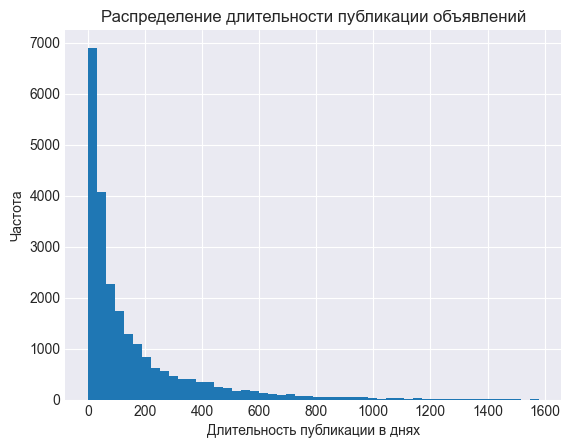

In [75]:
df.hist('days_exposition', bins = 50);
plt.title('Распределение длительности публикации объявлений');
plt.xlabel('Длительность публикации в днях');
plt.ylabel('Частота');

Выбросов и аномалий нет. Помним о том, что значение "0" соответсвует тем объявлениям, которые еще не сняты с публикации.

#### Итог
Мы последовательно отфильтровали исходный датафрейм `data` от аномальных значений в различных столбцах, и получили датафрейм `df`. Посмотрим на количество строк в исходном датафрейме.

In [76]:
len(data)

23699

А теперь посмотрим, сколько строк в отфильтрованном новом датафрейме.

In [77]:
len(df)

23443

Выведем гистрограммы для всех столбцов с числовыми значениями, чтобы убедиться, что с данными теперь все в порядке.

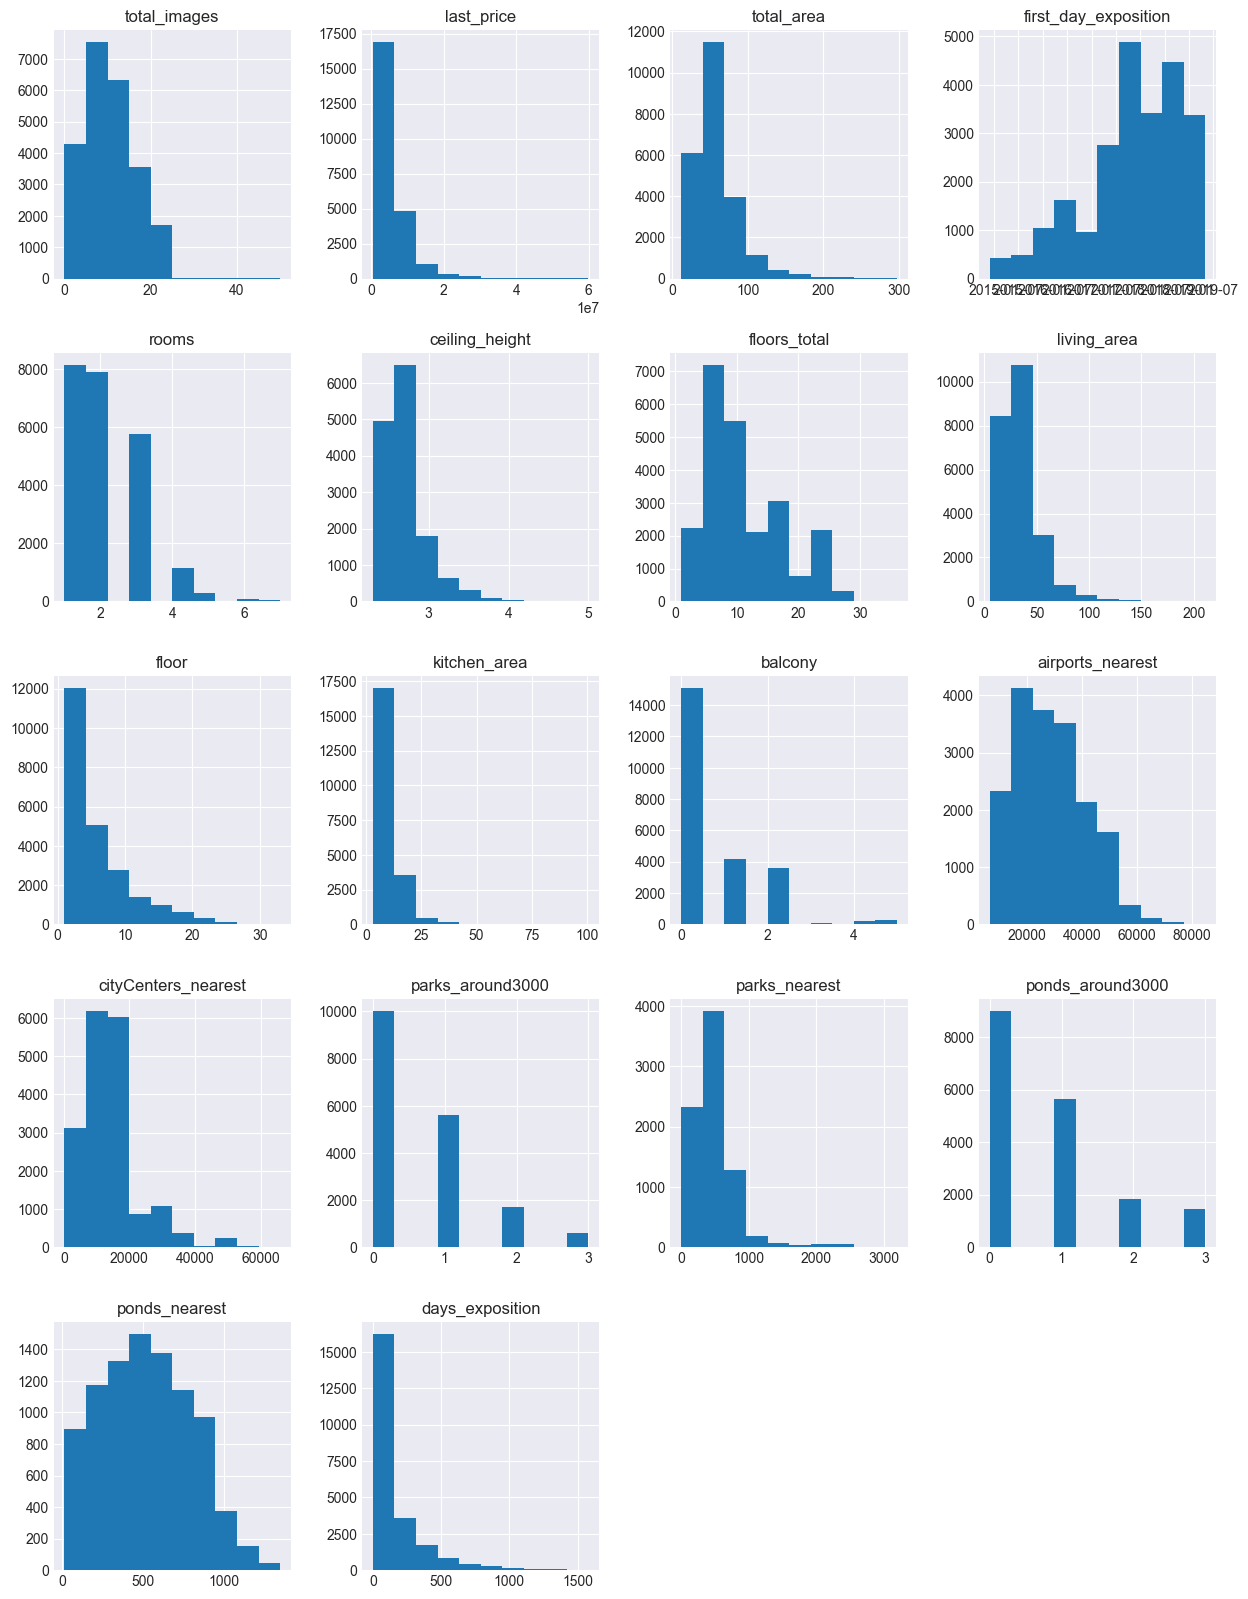

In [78]:
df.hist(figsize=(15, 20));

## Расчет необходимых новых показателей

### Расчет цены квадратного метра
Рассчитаем цену одного квадратного метра для каждой квартиры и добавим эту информацию в новый столбец `'price_m'`.

In [79]:
df['price_m'] = df['last_price'] / df['total_area'] 
# выводим первые 5 строк обновленного датафрейма
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474


### Определение дня недели публикации
Добавим новый столбце `'weekday_exposition'`, в котором будет отражен день недели для каждого объявления: понедельник — день 0, а воскресенье — день 6.

In [80]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
# выводим первые 5 строк обновленного датафрейма
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0


### Определение месяца публикации объявления
Добавим новый столбец `'month_exposition'`, в котором будет отражен месяц публикации каждого объявления.

In [81]:
df['month_exposition'] = df['first_day_exposition'].dt.month
# выводим первые 5 строк обновленного датафрейма
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9


### Определение года публикации объявления
Добавим новый столбец `'year_exposition'`, в котором будет отражен год публикации каждого объявления.

In [82]:
df['year_exposition'] = df['first_day_exposition'].dt.year
# выводим первые 5 строк обновленного датафрейма
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018


### Определение типа этажа квартиры
Добавим новый столбец `'floor_type'`, в котором будет отражен тип этажа квартиры: "первый", "последний", "другой".
Для этого напишем функцию, принимающую на вход номер этажа и этажность дома, и возвращающую тип этажа. В столбце `'floors_total'` были пропуски — в новом столбце `'floor_type'` значение в тех же строках тоже будет пропущено, если этаж квартиры не первый.

In [83]:
# функция, возвращающая тип этажа
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    if 1 < floor < floors_total:
        return 'другой'

# применяем функцию, чтобы создать новый столбец с типом этажа
df['floor_type'] = df.apply(floor_type, axis=1)
# выводим первые 5 строк обновленного датафрейма
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой


Проверим, что категоризация прошла успешно. 

In [84]:
df['floor_type'].value_counts()

другой       17193
последний     3271
первый        2896
Name: floor_type, dtype: int64

### Расчет расстояния до центра города в километрах

Создадим новый столбец `'cityCenters_nearest_km'` со значениями из столбца `'cityCenters_nearest'`, переведенными из м в км и округленными до целых значений.

In [85]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN


## Исследовательский анализ данных

### Изучение параметров объектов

#### Общая площадь
Посмотроим гистограмму распределения общей площади и выведем показатели описальной статистики.

count    23443.000000
mean        58.964768
std         28.911546
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        297.500000
Name: total_area, dtype: float64

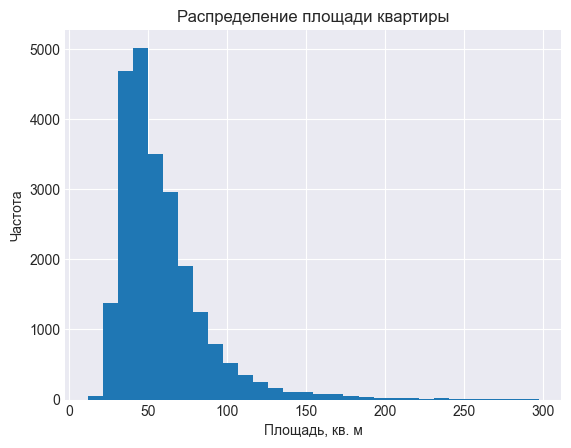

In [86]:
df.hist('total_area', bins=30);
plt.title('Распределение площади квартиры')
plt.xlabel('Площадь, кв. м');
plt.ylabel('Частота');
df['total_area'].describe()

Общая площадь объектов недвижимости варьирует в пределах от 12 до 297 м², медианное значене составляет 52 м². Подавляющее большинство продаваемых объектов имеют площадь меньше 150 м².

#### Жилая площадь
Посмотроим гистограмму распределения жилой площади и выведем показатели описальной статистики.

count    23443.000000
mean        33.815489
std         19.012901
min          5.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        211.000000
Name: living_area, dtype: float64

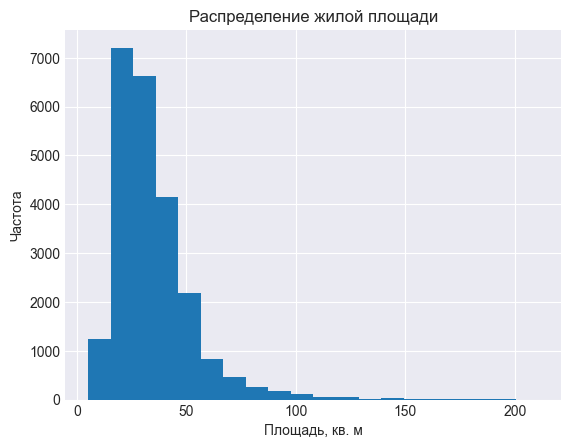

In [87]:
df.hist('living_area', bins=20);
plt.title('Распределение жилой площади')
plt.xlabel('Площадь, кв. м');
plt.ylabel('Частота');
df['living_area'].describe()

Жилая площадь объектов недвижимости варьирует в пределах от 5 до 211 м², медианное значене составляет 30 м². Подавляющее большинство продаваемых объектов имеют жилую площадь меньше 100 м².

#### Площадь кухни
Посмотроим гистограмму распределения площади кухни и выведем показатели описальной статистики.

count    21255.000000
mean        10.441707
std          5.437349
min          3.000000
25%          7.000000
50%          9.100000
75%         12.000000
max        100.700000
Name: kitchen_area, dtype: float64

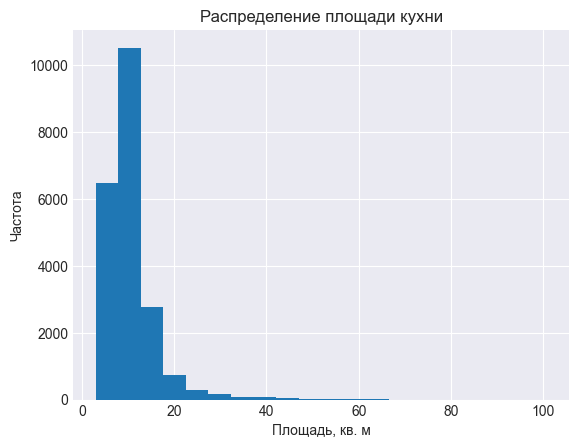

In [88]:
df.hist('kitchen_area', bins=20);
plt.title('Распределение площади кухни')
plt.xlabel('Площадь, кв. м');
plt.ylabel('Частота');
df['kitchen_area'].describe()

Площадь кухни варьирует в пределах от 3 до 100.7 м², медианное значене составляет 9.1 м². Подавляющее большинство продаваемых объектов имеют площадь кухни меньше 40 м².

#### Цена объекта
Посмотроим гистограмму распределения цен на квартиры и выведем показатели описальной статистики.

count    2.344300e+04
mean     6.019873e+06
std      5.131423e+06
min      4.300000e+05
25%      3.414000e+06
50%      4.600000e+06
75%      6.700000e+06
max      5.991412e+07
Name: last_price, dtype: float64

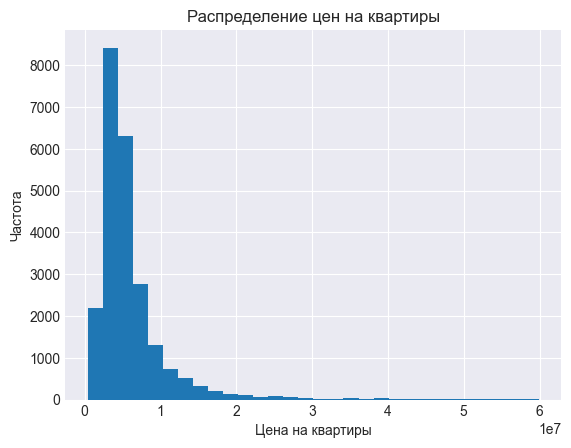

In [89]:
df.hist('last_price', bins=30);
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена на квартиры');
plt.ylabel('Частота');
df['last_price'].describe()

Цены на квартиры варьируют в пределах от 4.3 до 59.9 млн, медианное значение составляет 4.6 млн. Подавляющее большинство продаваемых объектов продаются меньше, чем за 30 млн.

#### Количество комнат
Посмотроим гистограмму распределения количества комнат и посмотрим на частоту встречаемости квартир с различным числом комнат.

1    0.347950
2    0.338054
3    0.246683
4    0.049098
5    0.012712
6    0.003711
7    0.001792
Name: rooms, dtype: float64

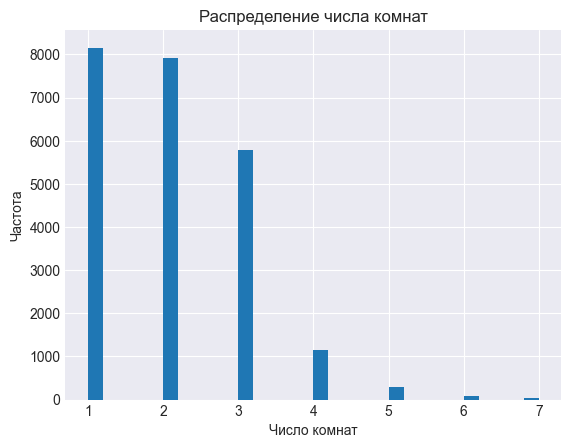

In [90]:
df.hist('rooms', bins=30);
plt.title('Распределение числа комнат')
plt.xlabel('Число комнат');
plt.ylabel('Частота');
df['rooms'].value_counts(normalize=True)

Наиболее часто в датафрейме встречаются однокомнатные и двухкомнатные квартиры — на их долю приходится около 68% объявлений. Трехкомнатные квартиры встречаются почти в 25% случаев. На долю остальных квартир (с 4, 5, 6 и 7 комнатами) приходится чуть более 6%.

#### Высота потолков
Посмотроим гистограмму распределения высоты потолков и выведем показатели описальной статистики.

count    14358.000000
mean         2.721697
std          0.264530
min          2.300000
25%          2.510000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

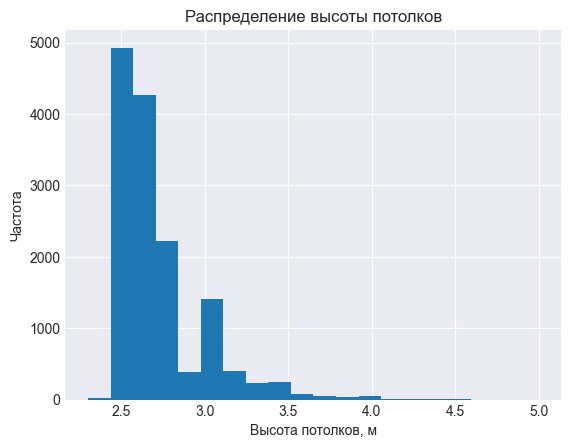

In [91]:
df.hist('ceiling_height', bins=20);
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков, м');
plt.ylabel('Частота');
df['ceiling_height'].describe()

Высота потолков варьирует в пределах от 2.3 до 5 м, медианное значение составляет 2.65 м. Подавляющее большинство продаваемых объектов имеют потолки высотой менее 3.5 м.

#### Этаж квартиры
Посмотроим гистограмму распределения этажа квартиры и выведем показатели описальной статистики.

count    23443.000000
mean         5.886149
std          4.880752
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

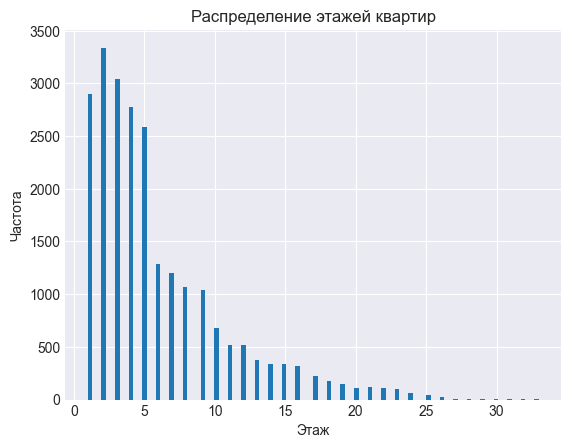

In [92]:
df.hist('floor', bins=100);
plt.title('Распределение этажей квартир')
plt.xlabel('Этаж');
plt.ylabel('Частота');
df['floor'].describe()

Квартиры в датафрейме располагаются на 1—33 этажах, наиболее часто — на втором этаже. Медианное значение этажа — 4.

#### Тип этажа квартиры
Посмотроим на частоту встречаемости квартир на различных типах этажей и построим по этим данным столбчатый график.

In [93]:
df['floor_type'].value_counts(normalize=True)

другой       0.736002
последний    0.140026
первый       0.123973
Name: floor_type, dtype: float64

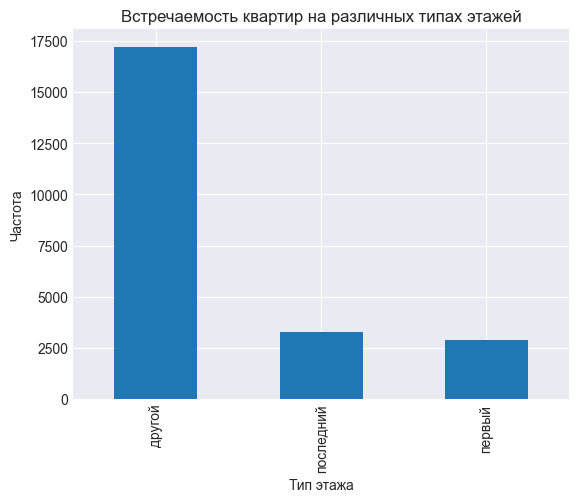

In [94]:
df['floor_type'].value_counts().plot(kind='bar');
plt.title('Встречаемость квартир на различных типах этажей')
plt.xlabel('Тип этажа');
plt.ylabel('Частота');

Большинство квартир располагаются не на первом и не на последнем этажах. Квартиры на первом этаже составляют около 12% датафрейма, квартиры на последнем этаже составляют окло 14% датафрейма.

#### Общее количество этажей в доме
Посмотроим гистограмму распределения общего числа этажей в доме и выведем показатели описальной статистики.

count    23357.000000
mean        10.678126
std          6.579419
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

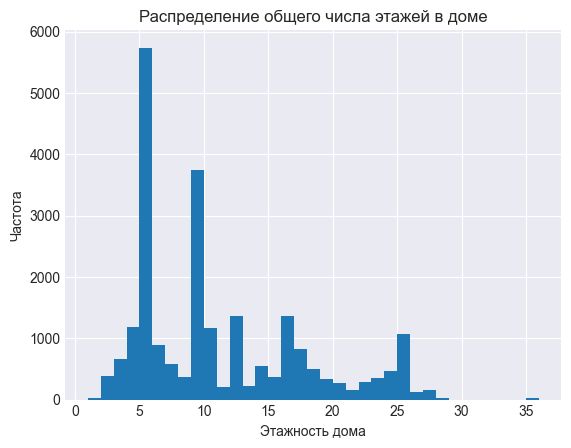

In [95]:
df.hist('floors_total', bins=35);
plt.title('Распределение общего числа этажей в доме')
plt.xlabel('Этажность дома');
plt.ylabel('Частота');
df['floors_total'].describe()

Больше всего квартир продается в пятиэтажках. В целом распределение этажности домов имеет несколько пиков — на значениях 5, 9, 12, 16 и 25, что отражает реальность типовых застроек. 

#### Расстояние до центра города в метрах
Посмотроим гистограмму распределения расстояния до центра города и выведем показатели описальной статистики.

count    17969.000000
mean     14260.962268
std       8599.844363
min        181.000000
25%       9380.000000
50%      13145.000000
75%      16318.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

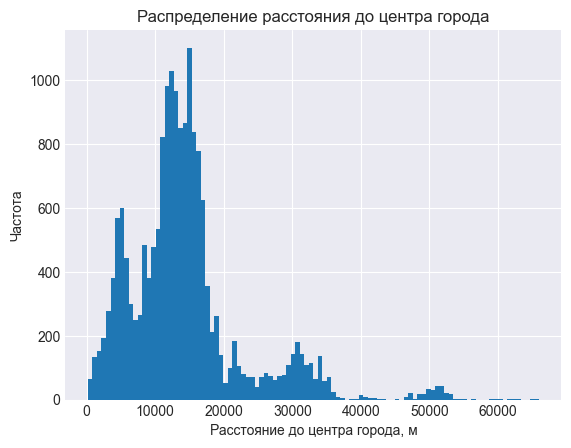

In [96]:
df.hist('cityCenters_nearest', bins=100);
plt.title('Распределение расстояния до центра города')
plt.xlabel('Расстояние до центра города, м');
plt.ylabel('Частота');
df['cityCenters_nearest'].describe()

Расстояние до центра города составяет от 181 м до почти 66 км, медианное значение — около 13 км. Распределение носит сложный характер потому что в датафрейме присутствуют данные о квартирах в разных городах. Поскольку у каждого города свой центр, то общее распределение расстояния до центра города является неравновесной суммой распределений расстояния до центра города для каждого отдельного населенного пункта.

#### Расстояние до ближайшего аэропорта
Посмотроим гистограмму распределения расстояния до ближайшего аэропорта и выведем показатели описальной статистики.

count    17948.000000
mean     28827.815077
std      12664.552889
min       6450.000000
25%      18545.000000
50%      26777.000000
75%      37364.000000
max      84869.000000
Name: airports_nearest, dtype: float64

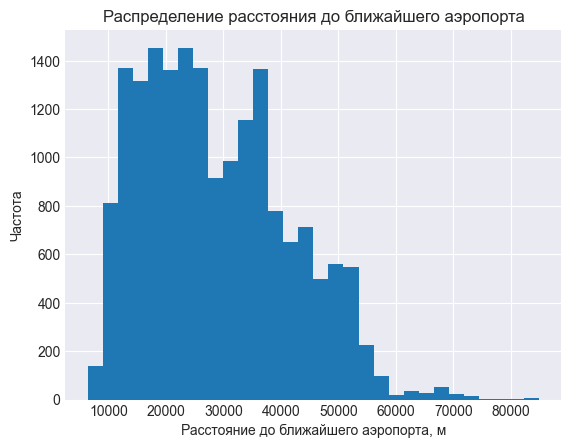

In [97]:
df.hist('airports_nearest', bins=30);
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта, м');
plt.ylabel('Частота');
df['airports_nearest'].describe()

Расстояние до ближайшего аэропорта варьирует от 6,5 км до почти 85 км. Медианное расстояние — 26,7 км. Подавляющее большинство  квартир расположено на расстоянии не более, чем 60 км от аэропорта.

#### Расстояние до ближайшего парка

Посмотроим гистограмму распределения расстояния до ближайшего парка и выведем показатели описальной статистики.

count    7942.000000
mean      491.549987
std       342.501223
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

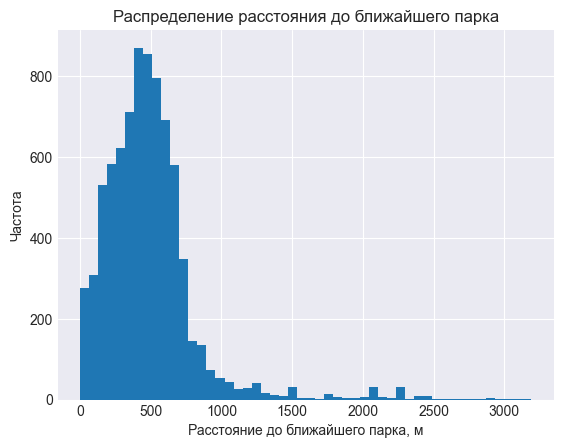

In [98]:
df.hist('parks_nearest', bins=50);
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м');
plt.ylabel('Частота');
df['parks_nearest'].describe()

Расстояние до ближайшего парка варьирует в пределах от 1 м до 3,2 км, медианное значение составляет 455 м. Подавляющее большинство продаваемых объектов расположены в пределах 1,5 км от ближайшего парка.

#### День и месяц публикации объявления
Выведем таблицу частот для дней недели публикации объявления.

In [99]:
df['weekday_exposition'].value_counts(normalize=True, sort=False)

0    0.152796
1    0.176769
2    0.167769
3    0.180864
4    0.168707
5    0.081517
6    0.071578
Name: weekday_exposition, dtype: float64

Аналогичную таблицу частот выведем для месяца публикации объявления.

In [100]:
df['month_exposition'].value_counts(normalize=True, sort=False)

1     0.063430
2     0.111377
3     0.109372
4     0.100584
5     0.053747
6     0.074393
7     0.071279
8     0.073924
9     0.083180
10    0.089750
11    0.099902
12    0.069061
Name: month_exposition, dtype: float64

Построим столбчатые диаграммы по полученным данным.

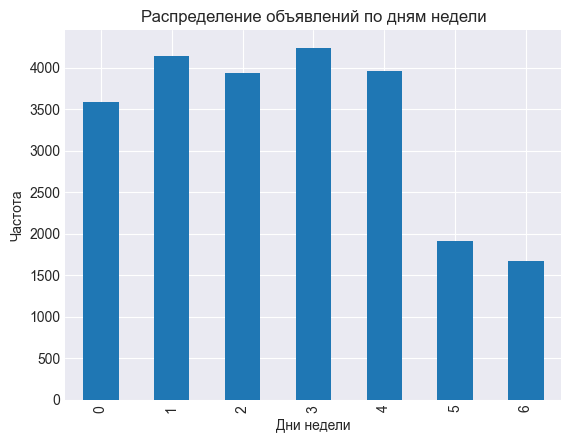

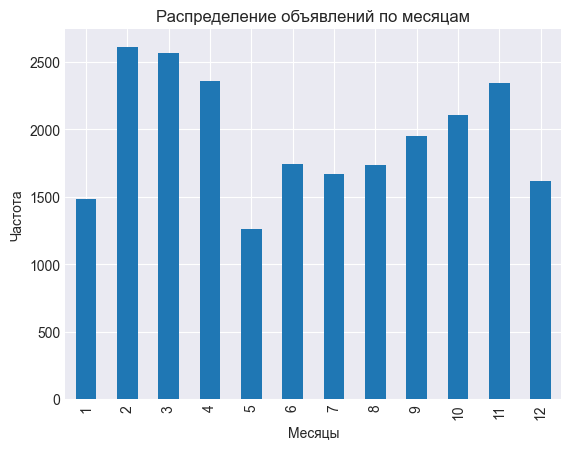

In [101]:
df['weekday_exposition'].value_counts(sort=False).plot(kind='bar');
plt.title('Распределение объявлений по дням недели');
plt.xlabel('Дни недели');
plt.ylabel('Частота');
plt.show()
df['month_exposition'].value_counts(sort=False).plot(kind='bar')
plt.title('Распределение объявлений по месяцам');
plt.xlabel('Месяцы');
plt.ylabel('Частота');
plt.show()

Видно, что по выходным объявления о продаже квартир публикуются значительно реже. Кроме того, интенсивность публикации объявлний снижается в январе, мае и декабре. Вероятно, это связано с праздничными и предпраздничными днями. Максимальное количество объявлений пубикуется в феврале, марте и апреле.

### Анализ скорости продажи квартир
Проанализируем, сколько дней были размещены объявления о продаже квартир. Для начала создадим новый датафрейм `df_sold`, в который включим только те объявления, которые уже были сняты с публикации.

In [102]:
# исключаем строки, в которых значение 'days_exposition' соответствует 0 — эти объявления все еще актуальны
df_sold = df.query('days_exposition != 0')

Посмотрим на распределение длительности публикации объявлений в этом новом датафрейме.

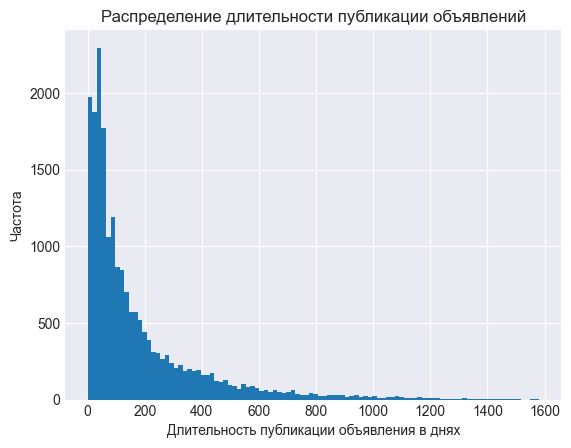

In [103]:
df_sold.hist('days_exposition', bins=100)
plt.title('Распределение длительности публикации объявлений')
plt.xlabel('Длительность публикации объявления в днях');
plt.ylabel('Частота');

Получим также описательные статистики для столбца `'days_exposition'`.

In [104]:
df_sold['days_exposition'].describe()

count    20300.000000
mean       180.458473
std        219.238924
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Длительность публикации объявлений составила от 1 дня до 1580 дней. В среднем — 180 дней, медианное значение — 95 дней.

Если посмотреть прицельно на данные в диапазоне от 0 до 100 дней, то заметно, что на 45, 60 и 90 дни приходятся пики (то есть именно в эти сроки чаще всего происходит снятия объявления с публикации). Эти пики связаны с тем, что период бесплатного размещения объявлений составляет 45, 60 или 90 дней.

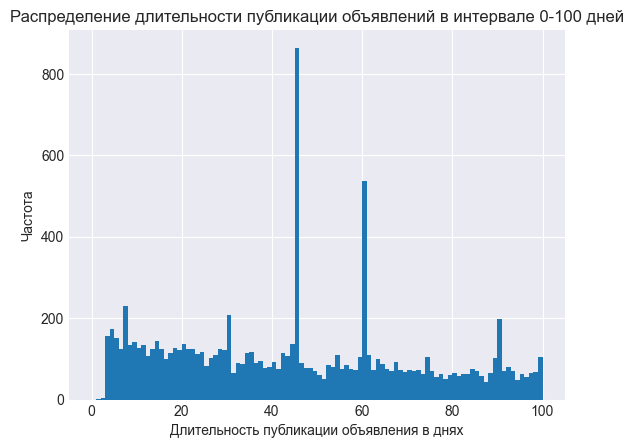

In [105]:
df_sold.hist('days_exposition', bins=100, range=(0,100))
plt.title('Распределение длительности публикации объявлений в интервале 0-100 дней')
plt.xlabel('Длительность публикации объявления в днях');
plt.ylabel('Частота');

Примем, что очень быстрые продажи — это те, которые происходят быстрее, чем 95% всех продаж. Посмотрим, какие продажи в таком случае можно считать быстрыми.

In [106]:
df_sold['days_exposition'].quantile(0.05)

9.0

Продажи, занявшие меньше 9 дней, можно считать очень быстрыми.  
Теперь посмотрим на очень медленные продажи — те, которые происходят медленне, чем 95% всех продаж.

In [107]:
df_sold['days_exposition'].quantile(0.95)

643.0499999999993

Продажи, занявшие больше 643 дней, можно считать очень медленными.

### Анализ факторов, влияющих на стоимость объекта
Необходимо провести исследование фактров, влияющих на общую стоимость объектов. Общая площадь, жилая площадь и площадь кухни относятся к непрерывным переменным, и мы предполагаем, что должна быть линейная зависимость между этими параметрами и стоимостью квартиры — для этих факторов мы построим диаграммы рассеяния и посчитаем коэффициент корреляции. Количество комнат, тип этажа и даты размещения объявлений относятся к категориальным переменным — для них мы сделаем сводные таблицы и столбчатые графики.

#### Влияние общей площади на стоимость объекта
Построим диаграмму рассеяния, где по одной оси откладываются значения общей площади квартиры, а по другой — значения стоимости квартиры.

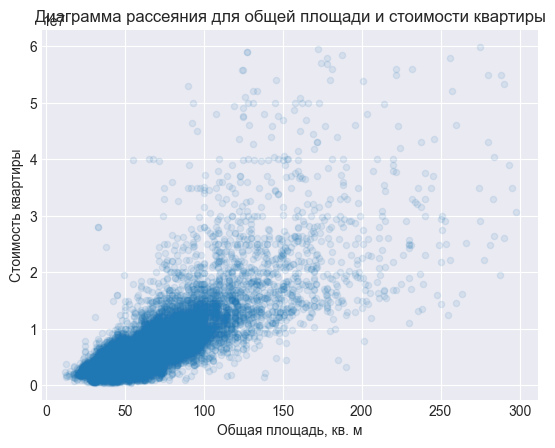

In [108]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1);
plt.title('Диаграмма рассеяния для общей площади и стоимости квартиры');
plt.xlabel('Общая площадь, кв. м');
plt.ylabel('Стоимость квартиры');

Рассчитаем коэффициент корреляции Пирсона для переменных `'last_price'` и `'total_area'`.

In [109]:
df['total_area'].corr(df['last_price'])

0.7746912971755191

Прослеживается линейная зависимость между общей площадью и стоимостью квартиры: чем больше площадь, тем больше стоимость. При этом связь сильнее выражена для тех квартир, площадь которых не превышает 120 м². Для квартир большей площади разброс значений стоимости довольно большой. 

#### Влияние жилой площади на стоимость объекта
Построим диаграмму рассеяния, где по одной оси откладываются значения жилой площади, а по другой — значения стоимости квартиры.

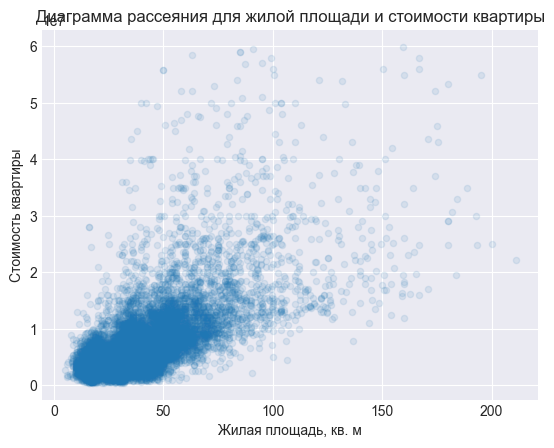

In [110]:
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1);
plt.title('Диаграмма рассеяния для жилой площади и стоимости квартиры');
plt.xlabel('Жилая площадь, кв. м');
plt.ylabel('Стоимость квартиры');

Рассчитаем коэффициент корреляции Пирсона для переменных `'last_price'` и `'living_area'`.

In [111]:
df['living_area'].corr(df['last_price'])

0.6803789697311211

Как и следовало ожидать, цена квартиры зависит от жилой площади аналогичным образом. Связь также более выражена для квартир с меньшей жилой площадью (приблизительно до 80 м²).

#### Влияние площади кухни на стоимость объекта
Построим диаграмму рассеяния, где по одной оси откладываются значения площади кухни, а по другой — значения стоимости квартиры.

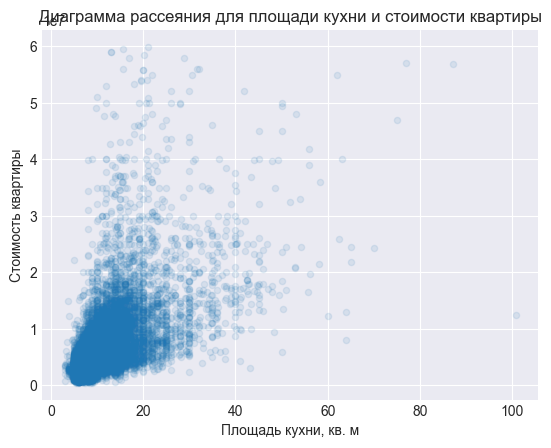

In [112]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1);
plt.title('Диаграмма рассеяния для площади кухни и стоимости квартиры');
plt.xlabel('Площадь кухни, кв. м');
plt.ylabel('Стоимость квартиры');

Рассчитаем коэффициент корреляции Пирсона для переменных `'last_price'` и `'kitchen_area'`.

In [113]:
df['kitchen_area'].corr(df['last_price'])

0.5919454514872345

Закономерно наблюдаем похожую линейную зависимость стоимости квартиры от площади кухни, более выраженную для квартир с площадью кухни до 20 м². 

Наиболее "сильная" связь (ККП=0.77) была обнаружена между общей площадью и стоимостью квартиры. Влияние жилой площади (ККП=0.68) и площади кухни (ККП=0.59), по всей вероятности, опосредовано влиянием общей площади квартиры. Убедимся в том, что жилая площадь и площадь кухни зависят от общей площади квартиры. Для этого построим матрицу диаграмм рассеяния для переменных `'kitchen_area'`, `'living_area'`, `'total_area'`.

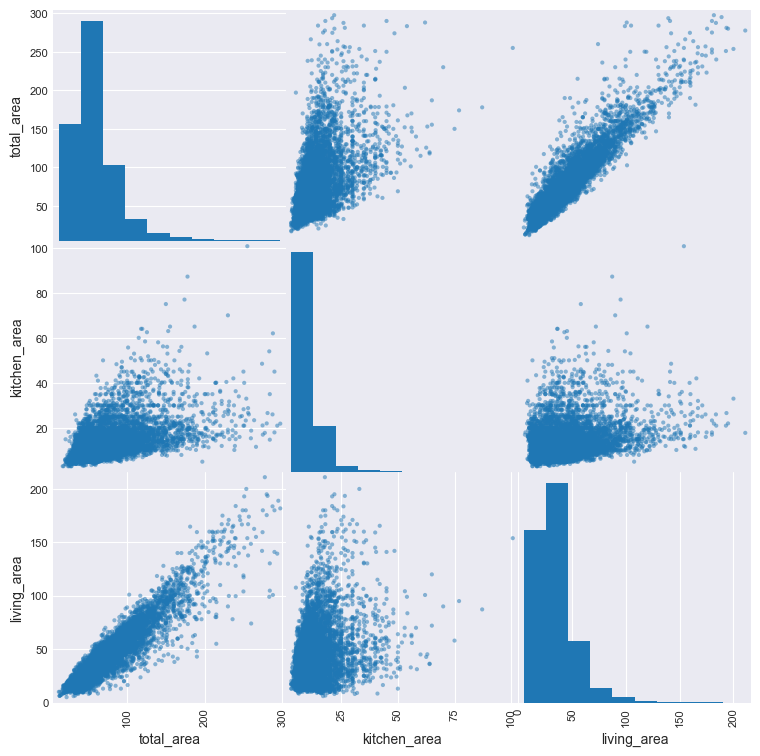

In [114]:
pd.plotting.scatter_matrix(df[['total_area', 'kitchen_area', 'living_area']], figsize=(9, 9));

Заметна отчетливая линейная связь между жилой площадью и общей площадью квартиры (однако надо иметь в виду, что 8% значений жилой площади были смоделированы на основе значений общей площади). Связь между площадью кухни и общей площадью квартиры выражена слабее, но тем не менее она есть. 

Таким образом, общая площадь квартиры оказывает влияние на стоимость квартиры. Жилая площадь влияет на стоимость квартиры опосредованно, через общую площадь. Что касается площади кухни, то скорее всего, ее влияние на стоимость квартиры также опосредовано общей площадью, однако следовало бы провести дополнительный анализ и посмотреть, оказывает ли площадь кухни влияние на стоимость квартиры независимо.

#### Влияние количества комнат на стоимость квартиры
Для того, чтобы оценить влияние количества комнат на стоимость квартиры, сгруппируем данные в датафрейме по количеству комнат и посчитаем медиану стоимости квартиры в каждой группе. Выведем сводную таблицу, чтобы убедиться что в каждую группу попало достаточное количество наблюдений.

In [115]:
df.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
rooms,,
1,8157,3590000.0
2,7925,4770000.0
3,5783,6200000.0
4,1151,8975000.0
5,298,13000000.0
6,87,16900000.0
7,42,20750000.0


В группах с 0, 6 и 7 комнатами число наблюдений небольшое, но предположим, что достаточное для анализа. Построим по этим данным столбчатую диаграмму.

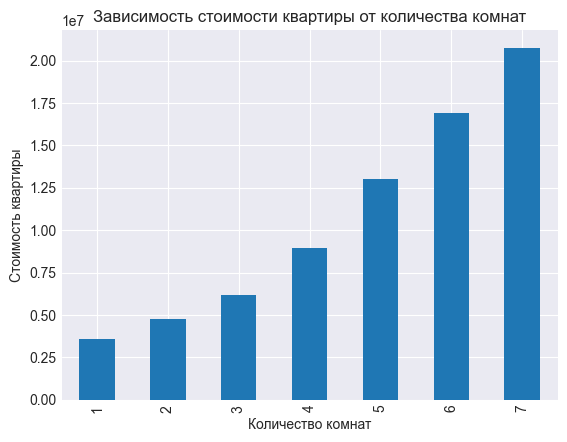

In [116]:
df.pivot_table(index='rooms', values='last_price', aggfunc=['median']).plot(kind='bar', legend=False)
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат');
plt.ylabel('Стоимость квартиры');

Заметно, что стоимость квартиры зависит от количества комнат, причем характер этой зависимости экспоненциальный.

#### Влияние типа этажа на стоимость квартиры
Для того, чтобы оценить влияние типа этажа на стоимость квартиры, сгруппируем данные в датафрейме по типу этажа и посчитаем медиану стоимости квартиры в каждой группе. Выведем сводную таблицу, чтобы убедиться что в каждую группу попало достаточное количество наблюдений.

In [117]:
df.pivot_table(index='floor_type', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
floor_type,,
другой,17193,4800000.0
первый,2896,3900000.0
последний,3271,4300000.0


Построим по этим данным столбчатую диаграмму.

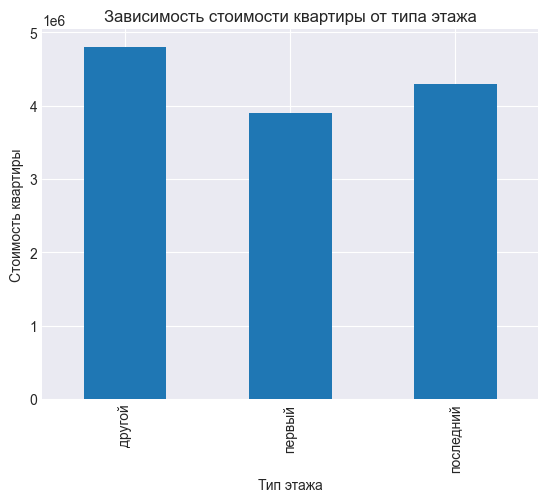

In [118]:
df.pivot_table(index='floor_type', values='last_price', aggfunc=['median']).plot(kind='bar', legend=False);
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.xlabel('Тип этажа');
plt.ylabel('Стоимость квартиры');

Наименее дорогие квартиры располагаются на первом этаже, затем следуют квартиры, располагающиеся на последнем этаже. Самые дорогие квартиры расположены не на первых и не на последних этажах здания. В среднем, квартиры на первом этаже стоят на 0.9 млн дешевле, чем те, что располагаются не на первом и не на последнем этаже, и на 0,4 млн дешевле, чем квартиры на последнем этаже.

#### Влияние даты публикации объявления на стоимость квартиры
Для того, чтобы оценить влияние даты публикации объявдения на стоимость квартиры, сгруппируем данные в датафрейме по дню недели, по месяцу и по году публикации. Посчитаем медиану стоимости квартиры в каждой группе. Выведем сводную таблицу, чтобы убедиться что в каждую группу попало достаточное количество наблюдений.

Сводная таблица по дням недели:

In [119]:
df.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
weekday_exposition,,
0,3582,4650000.0
1,4144,4700000.0
2,3933,4700000.0
3,4240,4600000.0
4,3955,4550000.0
5,1911,4512000.0
6,1678,4550000.0


Сводная таблица по месяцам:

In [120]:
df.pivot_table(index='month_exposition', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
month_exposition,,
1,1487,4600000.0
2,2611,4650000.0
3,2564,4650000.0
4,2358,4785000.0
5,1260,4500000.0
6,1744,4400000.0
7,1671,4600000.0
8,1733,4570000.0


Сводная таблица по годам:

In [121]:
df.pivot_table(index='year_exposition', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
year_exposition,,
2014,134,7540000.0
2015,1170,5285000.0
2016,2755,4500000.0
2017,8070,4500000.0
2018,8459,4550000.0
2019,2855,5000000.0


Во всех группах достаточное количество наблюдений. Построим столбчатые графики по этим сводным таблицам.

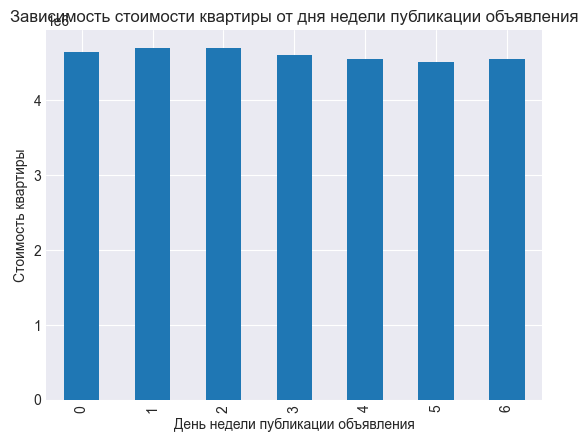

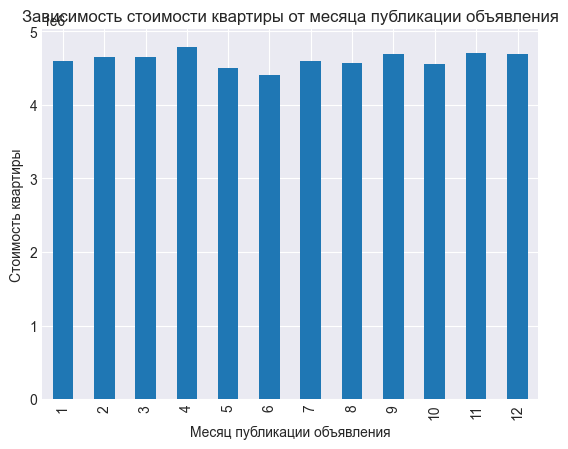

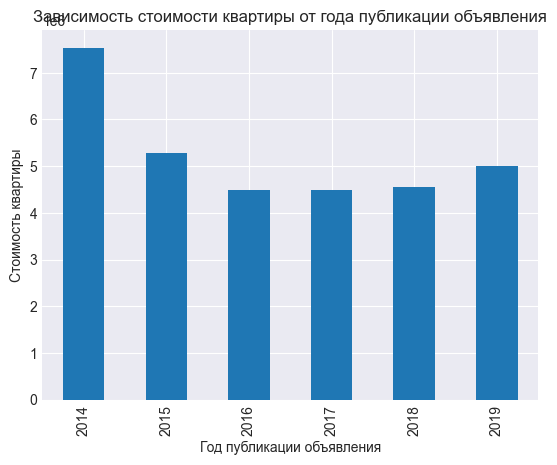

In [122]:
df.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['median']).plot(kind='bar', legend=False)
plt.title('Зависимость стоимости квартиры от дня недели публикации объявления')
plt.xlabel('День недели публикации объявления');
plt.ylabel('Стоимость квартиры');
plt.show()
df.pivot_table(index='month_exposition', values='last_price', aggfunc=['median']).plot(kind='bar', legend=False)
plt.title('Зависимость стоимости квартиры от месяца публикации объявления')
plt.xlabel('Месяц публикации объявления');
plt.ylabel('Стоимость квартиры');
plt.show()
df.pivot_table(index='year_exposition', values='last_price', aggfunc=['median']).plot(kind='bar', legend=False)
plt.title('Зависимость стоимости квартиры от года публикации объявления')
plt.xlabel('Год публикации объявления');
plt.ylabel('Стоимость квартиры');
plt.show()

Явной зависимости стоимости квартиры от дня недели или месяца публикации объявления не прослеживается. Однако заметно, что цены на квартиры резко упали после 2014 года (интересно, почему), достигли минимума в 2016—2017 годах, а затем в 2019 году немного выросли. 

### Расчет стоимости квадратного метра в различных населенных пунктах

Сперва найдем 10 населенных пунктов с наибольшим числом объявлений. Для этого сгруппируем данные по названиям населенных пунктов, посчитаем число объявлений в каждой группе, отсортируем получившуюся таблицу по убыванию и отберем первые 10 строк. Запишем названия населенных пунктов в отдельный список.

In [123]:
locality_list = df.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10).reset_index()
locality_list = locality_list['locality_name']
locality_list

0      Санкт-Петербург
1       поселок Мурино
2       поселок Шушары
3           Всеволожск
4               Пушкин
5              Колпино
6    поселок Парголово
7              Гатчина
8      деревня Кудрово
9               Выборг
Name: locality_name, dtype: object

Следующим шагом необходимо посчитать среднюю стоимость квадратного метра в тех населенных пунктах, которые есть в списке `locality_dict`. Для этого отберем из датафрейма только те строки, которые относятся к населенным пунктам из списка.

In [124]:
df_top10_location = df.query('locality_name in @locality_list')

Проверяем результат.

In [125]:
df_top10_location['locality_name'].value_counts()

Санкт-Петербург      15518
поселок Мурино         547
поселок Шушары         440
Всеволожск             397
Пушкин                 366
Колпино                337
поселок Парголово      324
Гатчина                307
деревня Кудрово        287
Выборг                 235
Name: locality_name, dtype: int64

Теперь сгруппируем данные по названиям населенного пункта и посчитаем среднюю стоимость квадратного метра в каждой группе.

In [126]:
df_top10_location.pivot_table(index='locality_name', values='price_m', aggfunc='mean').sort_values(by='price_m', ascending=False)

,price_m
locality_name,
Санкт-Петербург,112610.631149
Пушкин,103085.949105
деревня Кудрово,92312.310411
поселок Парголово,90191.147389
поселок Мурино,85476.234060
поселок Шушары,78677.364217
Колпино,75333.295801
Гатчина,68746.146763
Всеволожск,68719.320400


Самый высокая цена на квадратный метр — в Санкт-Петербурге. Если брать только 10 самых популярных населенных пунтков в датафрейме, то самая низка цена на квадратный метр — в Выборге. 

### Зависимость цены квадратного метра в Санкт-Петербурге от удаленности от центра
Создадим новый датафрейм `df_piter`, в который включим только те квартиры, которые располагаются в Санкт-Петербурге.

In [127]:
df_piter = df.query('locality_name == "Санкт-Петербург"').copy()
# посчитаем количество строк в датафрейме
len(df_piter)

15518

Строк в датафрейме 15518 — совпадает с тем, что мы получили в п. 4.4.  
Теперь посмотрим размах удаленности квартир в объявлениях от центра Санкт-Петербурга в километрах.

In [128]:
df_piter['cityCenters_nearest_km'].describe()

count    15460.000000
mean        11.653493
std          4.833101
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: cityCenters_nearest_km, dtype: float64

Удаленность квартир от центра Санкт-Петербурга варьирует от 0 до 29 км. Разобьем данные в датафрейме `df_piter` на сопоставимые по размерам группы в зависимости от удаленности от центра. Запишем информацию о принадлежности к группе в новый столбец `'distance_category'`.

In [129]:
df_piter['distance_category'] = pd.qcut(df_piter['cityCenters_nearest_km'], q=10)
# проверяем, как прошла категоризация
df_piter['distance_category'].value_counts()

(13.0, 15.0]     2836
(-0.001, 5.0]    2396
(7.0, 10.0]      1897
(11.0, 12.0]     1595
(12.0, 13.0]     1447
(15.0, 16.0]     1263
(10.0, 11.0]     1172
(5.0, 7.0]        993
(17.0, 29.0]      983
(16.0, 17.0]      878
Name: distance_category, dtype: int64

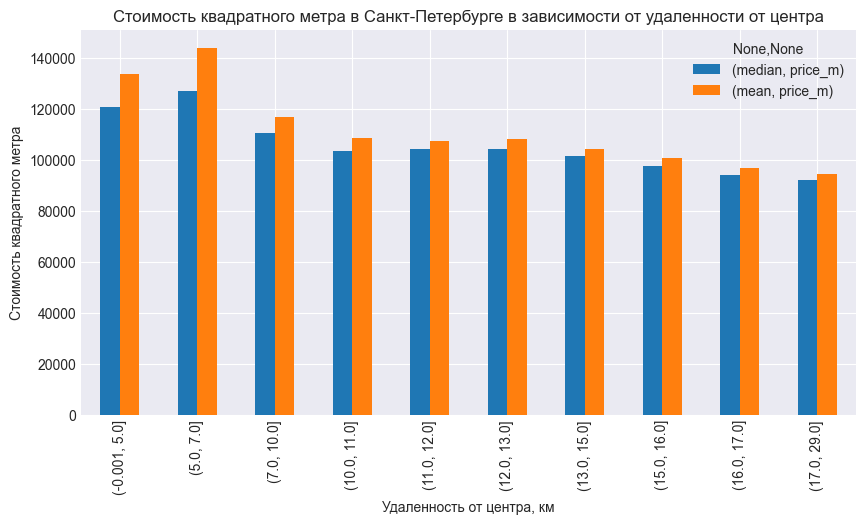

In [130]:
df_piter.pivot_table(
    index='distance_category', 
    values='price_m', 
    aggfunc=['median', 'mean']).plot(
    kind='bar', 
    figsize=(10, 5));
plt.title('Стоимость квадратного метра в Санкт-Петербурге в зависимости от удаленности от центра')
plt.xlabel('Удаленность от центра, км');
plt.ylabel('Стоимость квадратного метра');

Цена за квадратный метр в целом снижается по мере удаления от центра, исключение составляют лишь квартиры, находящиеся в радиусе 5 км от центра. Они стоят дешевле в пересчете на квадратный метр, чем те, что находятся на расстоянии 5—7 км. Это странное наблюдение, требующее дальнейшего углубленного анализа. Поскольку тенденция прослеживается и по среднему значению, и по медиане, маловероятно, что она связана с наличием какого-то выброса (очень дорогой квартиры) в группе удаленности от центра на  5—7 км. Возможно, в самом центре города жилье более ветхое, или цена на эти объекты несколько ниже из-за высокого уровня шума в туристический сезон. Возможно также, что элитные застройки в Санкт-Петербурге находятся за пределами радуса в 5 км.

## Общий вывод

В исходном датафрейме было много столбцов с пропусками: `'ceiling_height'`, `'floors_total'`, `'living_area'`, `'is_apartment'`, `'kitchen_area'`, `'balcony'`, `'locality_name'`, `'airports_nearest'`, `'cityCenters_nearest'`, `'parks_around3000'`, `'parks_nearest'`, `'ponds_around3000'`, `'ponds_nearest'`, `'days_exposition'`. Наиболее часто пропуски встречались в столбцах, содержащих информацию о высоте потолков, типе жилья (апартаменты или нет), количестве балконов и различных картографических характеристиках. Мы предположили, что отсутствие информации о балконах означает, что балконов в квартире нет, и заменили пропущенные значения в этом столбце на 0. Отсутствующие значения в столбце `'living_area'` мы заменили на смоделированные значения, основываясь на информации об общей площади квартиры. Пропуски в столбце с названием населенного пункта заменили на заглушку "Нет данных". Пропуски в столбце с длительностью публикации объявления заменили на 0, предположив, что эти объявления еще актуальны.

Следующий шаг заключался в устранении неявных дубликатов в столбце `'locality_name'`. Для этого мы привели к общему виду типы населенных пунктов "поселок", "посёлок" и "поселок городского типа".

Затем мы изучили данные на предмет выбросов и аномальных значений. Изучая гистограммы распределения значений и списки уникальных значений в каждом столбце, выделили те значения, которые либо не могут быть реальными, либо встречаются крайне редко. С помощью формирования различных срезов данных, убедились в том, что в данных нет явно неправдоподобных значений (например, нет квартир, в которых жилая площадь превосходит общую и т.д.). В некоторых случаях (например, в случае с высотой потолков) мы заменили выбивающиеся значения, предположив, что имела место ошибка при вводе данных. 

Выводы по исследовательской части работы можно сформулировать следующим образом.
 - Медианное значение общей площади квартиры составляет 52 м².
 - Медианное значение жилой площади квартиры составляет 30 м².
 - Медианное значение жилой площади квартиры составляет 9 м².
 - Медианное значение цены на квартиру составляет 4.6 млн.
 - Медианное значение высоты потолков составляет 2.65 м.
 - Наибольшее число квартир продается на втором этаже.
 - Большинство квартир, выставленных на продажу, располагается не на первом и не на последнем этаже.
 - Наибольшее число квартир, выставленных на продажу, располагаются в пятиэтажках.
 - Почти 70% квартир, выставленных на продажу — одно- и двухкомнатные.
 - Медианное расстояние от квартиры до центра города составляет 13 км.
 - Медианное расстояние от квартиры до ближайшего аэропорта составляет 26,7 км.
 - Медианное расстояние от квартиры до ближайшего парка составляет 455 м.
 - По выходным объявления о продаже квартир публикуются значительно реже. 
 - Интенсивность публикации объявлний снижается в январе, мае и декабре.
 - Максимальное количество объявлений пубикуется в феврале, марте и апреле.
 - Цены на квартиры резко упали после 2014 года, достигли минимума в 2016—2017 годах, а затем в 2019 году немного выросли.
 - Наименее дорогие квартиры располагаются на первом этаже.
 - Самые дорогие квартиры расположены не на первых и не на последних этажах здания. 
 - Стоимость квартиры экспоненциально увеличивается с увеличением числа комнат в квартире.
 - Общая площадь квартиры оказывает влияние на стоимость квартиры: чем больше общая площадь квартиры, тем больше стоимость квартиры. 
 - Размер жилой площади влияет на стоимость квартиры опосредованно, через общую площадь. 
 - Площадь кухни влияет на стоимость квартиры также опосредовано, через общую площадь, однако следовало бы провести дополнительный анализ и посмотреть, оказывает ли площадь кухни влияние на стоимость квартиры независимо.
 - Топ-10 населенных пунктов с наибольшим числом выставленных на продажу квартир: Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг. 
 - Самая высокая цена на квадратный метр — в Санкт-Петербурге. 
 - Цена за квадратный метр в целом снижается по мере удаления от центра, исключение составляют лишь квартиры, находящиеся в радиусе 5 км от центра. Они стоят дешевле в пересчете на квадратный метр, чем те, что находятся на расстоянии 5—7 км. 
 
 
**Рекомендации:** работа над интерфейсом и архитектурой базы данных могла бы снизить количество пропусков. Например, для поля "Количество балконов" можно добавить подсказку "Если балконов нет, заполните поле нулем" или вариант "Нет балконов". Какие-то столбцы можно сделать обязательными для заполнения (например, `'floors_total'`, `'locality_name'` и `'is_apartment'`). С другой стороны, сделать все поля обязательными тоже нельзя — так, если пользователь не знает размер жилой площади, он может заполнить это поле неправдоподобным значением.

Что касается картографических данных, большое число пропусков в них, вероятно,связано с тем, что пользователи не указывают точный адрес. Для снижения числа пропусков необходимо сделать заполнение точного адреса обязательным.

Чтобы избежать неявных дубликатов в столбце `'locality_name'`, можно предложить пользователю выбор населенного пункта из списка, представительно позаботившись о том, чтобы список был унифицирован. 

Для снижения количества явно неправдоподобных значений можно для некоторых столбцов задать диапазон допустимых значений. Например, если пользователь указывает высоту потолков "25 м", система выдает сообщение "Проверьте введенное значение".